# import packages

In [2]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import json
from time import time

from collections import Counter

from konlpy.corpus import kolaw
from konlpy.tag import Hannanum
from konlpy.utils import concordance, pprint
import matplotlib.pyplot as plt
from matplotlib import pyplot

from konlpy.tag import *
from gensim.models.word2vec import Word2Vec

km = Komoran()
tw = Twitter()
han = Hannanum()
kkma = Kkma()

def draw_zipf(count_list, filename, color='blue', marker='o'):
    sorted_list = sorted(count_list, reverse=True)
    plt.plot(sorted_list, color=color, marker=marker)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    #pyplot.savefig(filename)


C:\Anaconda2\envs\py36\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# 나무위키

In [3]:
with open('C:/Users/boogi/Downloads/namuwiki_20180326.json') as f:
    data = json.load(f)

In [3]:
data[0]

{'contributors': ['namubot', 'R:hoon12560'],
 'namespace': '0',
 'text': '#redirect 느낌표\n',
 'title': '!'}

In [7]:
'''
import dask.bag as db
js = db.read_text('C:/Users/boogi/Downloads/namuwiki_1.json').map(json.loads)
js.take(1)
del js
'''

In [19]:
len(data)

565985

### 용량이 너무 커서 나눠서 다시 저장

In [8]:
'''
with open('C:/Users/boogi/Downloads/namuwiki_20180326.json') as f:
    data = json.load(f)
with open('C:/Users/boogi/Downloads/namuwiki_1.json', 'w') as outfile:
    json.dump(data[:int(len(data) * 0.25)], outfile)
with open('C:/Users/boogi/Downloads/namuwiki_2.json', 'w') as outfile:
    json.dump(data[int(len(data) *0.25):int(len(data) * 0.5)], outfile)
with open('C:/Users/boogi/Downloads/namuwiki_3.json', 'w') as outfile:
    json.dump(data[int(len(data) *0.5):int(len(data) * 0.75)], outfile)
with open('C:/Users/boogi/Downloads/namuwiki_4.json', 'w') as outfile:
    json.dump(data[int(len(data) *0.75):], outfile)
'''

"\nwith open('C:/Users/boogi/Downloads/namuwiki_1.json', 'w') as outfile:\n    json.dump(data[:int(len(data) * 0.25)], outfile)\nwith open('C:/Users/boogi/Downloads/namuwiki_2.json', 'w') as outfile:\n    json.dump(data[int(len(data) *0.25):int(len(data) * 0.5)], outfile)\nwith open('C:/Users/boogi/Downloads/namuwiki_3.json', 'w') as outfile:\n    json.dump(data[int(len(data) *0.5):int(len(data) * 0.75)], outfile)\nwith open('C:/Users/boogi/Downloads/namuwiki_4.json', 'w') as outfile:\n    json.dump(data[int(len(data) *0.75):], outfile)\n"

In [13]:
start = time()
alist = []
for i in range(int(len(data) / 7)):
    if i % 100 == 0:
        print(time() - start, i, '=' * 50)
    txt = '%s' % data[i]
    alist.append([jtem + '. ' for item in txt.split('wwn') for jtem in item.split('.') if len(tw.phrases(jtem)) < 5])
    #for item in txt.split('\\n'):
        #for jtem in item.split('.'):
            #if len(tw.phrases(jtem)) < 5:
                #atxt += jtem + '. '
#print(time() - start)

0.0020055770874023438 0 ==================================================
7.784707307815552 100 ==================================================
19.008559942245483 200 ==================================================
26.594767570495605 300 ==================================================
35.612722396850586 400 ==================================================
45.8188693523407 500 ==================================================
53.154885053634644 600 ==================================================
60.29387283325195 700 ==================================================
70.62036371231079 800 ==================================================
89.97782397270203 900 ==================================================


KeyboardInterrupt: 

In [14]:
start = time()
atxt = ''
#alist = []
for i in range(int(len(data) / 7)):
    if i % 100 == 0:
        print(time() - start, i, '=' * 50)
    txt = '%s' % data[i]
    #alist.append([jtem + '. ' for item in txt.split('wwn') for jtem in item.split('.') if len(tw.phrases(jtem)) < 5])
    for item in txt.split('\\n'):
        for jtem in item.split('.'):
            if len(tw.phrases(jtem)) < 5:
                atxt += jtem + '. '
print(time() - start)

0.0 0 ==================================================
7.637313365936279 100 ==================================================
18.928344249725342 200 ==================================================
26.267899990081787 300 ==================================================
34.04859209060669 400 ==================================================
42.70561933517456 500 ==================================================
49.384382009506226 600 ==================================================
56.347898960113525 700 ==================================================
64.51459264755249 800 ==================================================
78.9199070930481 900 ==================================================
104.1487226486206 1000 ==================================================
128.1786665916443 1100 ==================================================
152.6387186050415 1200 ==================================================
168.39058876037598 1300 =====================================

KeyboardInterrupt: 

In [15]:
import dask.dataframe as dd

ModuleNotFoundError: No module named 'dask'

In [4]:
keys = ['카지노', '호텔', '도박', '강원랜드']
minimal = ''
for i in range(len(data)):
    txt = '%s' % data[i]
    if any([True if key in txt else False for key in keys]):
        for item in txt.split('\\n'):
            if any([True if key in item else False for key in keys]):
                for jtem in item.split('.'):
                    if any([True if key in jtem else False for key in keys]):
                        minimal += jtem + '. '

In [14]:
len(minimal.split('.'))

43000

In [20]:
del data

nchars  : 3402026
ntokens : 719082
nmorphs : 31186

Top 20 frequent morphemes:
[(('.', 'Punctuation'), 9391),
 (('을', 'Josa'), 8143),
 (('[[', 'Punctuation'), 7274),
 ((',', 'Punctuation'), 6396),
 (('에', 'Josa'), 6229),
 ((']]', 'Punctuation'), 6168),
 (('의', 'Josa'), 5906),
 (('이', 'Josa'), 5323),
 (('호텔', 'Noun'), 5305),
 (('다', 'Eomi'), 4855),
 (('도박', 'Noun'), 4027),
 (('를', 'Josa'), 3884),
 (('가', 'Josa'), 3383),
 (('으로', 'Josa'), 2874),
 (('에서', 'Josa'), 2828),
 (('은', 'Josa'), 2519),
 (('로', 'Josa'), 2473),
 (('들', 'Suffix'), 2163),
 (('는', 'Josa'), 2082),
 (('(', 'Punctuation'), 1637),
 (('것', 'Noun'), 1575),
 (('고', 'Eomi'), 1534),
 (('카지노', 'Noun'), 1458),
 (('도', 'Josa'), 1383),
 (('과', 'Josa'), 1366),
 (('-', 'Punctuation'), 1362),
 (('이', 'Noun'), 1353),
 (('한', 'Verb'), 1327),
 (("\\'\\'\\'", 'Punctuation'), 1302),
 (('있다', 'Adjective'), 1253),
 (('하는', 'Verb'), 1242),
 (('인', 'Josa'), 1184),
 (('|', 'Punctuation'), 1157),
 (('한', 'Josa'), 1118),
 ((')', 'Punctuation'), 

447822	그녀를 이전과 똑같은 방법으로 무참히 살해한다.
447995	피하고, 저녁에 호텔 방에 돌아와서도 다른
447998	방에 돌아와서도 다른 방으로 들어가려 했다.
448042	\'분석적으로 마작을 하는 방법\'은 현대 마작에서는
448566	연구하기 위해서 혼자 호텔방에 틀어박혀 [[배트맨]]
448608	호프만을 문자메시지를 보내 방출한 후, 그
448664	어둠의 세계에서나 쓰는 방법을 쓸 수밖에
448769	아마데우스를 만나게 해주었다. 호텔방은 도둑이 들지
448881	VS 사일러는 호텔 방안에서 벌어지는 대결을
448945	수 없다. 단 첫방문시 카지노는 --한참
449039	산하 음식점인 \'신기루\'의 총주방장이라는 제의를 받고
449192	시작하는 호텔 2층의 방 중 하나에
449354	터미너스 호텔 청소원 방에 있다. *
449375	탄다. 가장 쉬운 방법이고 호텔 매니저가
449456	4인 중 한명)[* 4인방 중 외인부대에
449489	통해서 아래를 저격하는 방법, 사우나에 들어갔을
449495	때 온도를 올려버리는 방법, 너무 늦어서
449519	술에 타 버리는 방법이 있다. 프란츠
449545	청소하는 호텔 직원이 방에 들어가면서 늘
449629	투숙중인 "블레이크 덱스터"의 방에 잠입해 정보를
449695	[[코드네임 47|47]]에게 쥐어주고 방화를 하여 증거를
449738	허수아비. * 덱스터의 행방을 쫓아 최고급
450049	부산 조선호텔에 위탁운영하는 방식이었다. ~~대놓고 정신기~~]
450084	게 싫어서 호텔 방에 머물 때마다
450250	주는데, 비싼 보양식부터 금방울까지 얻을 수
450399	그 밖에 공중에 개방된 장소에서 하는
450428	그에 의하면, 품행의 방정이 요구되는 사관생도로서는
450689	전용 초호화 호텔에 방문하게 되며, 센토레아와
451291	살아야겠다고 다짐한다. 물론 추방자 복귀 같은
451300	한데 이 경우도 추방한 행위가 정당했는가에
451473	있다. 숙소를 잡기위해 방문한 호텔

595839	갈 때나 호텔 방에도 항상 일본어
595997	고층 최고급 호텔에 방을 잡고 그
596072	뒤 속옷차림으로 호텔 방에서 쫓겨난다. (도박사
596246	객실은 차있어서 빈 방이 없다고 가정했다.
596260	왔을 때 빈 방을 마련하는 것이
596268	힐베르트의 호텔은 1번 방의 손님은 2번
596271	방의 손님은 2번 방으로, 2번 방의
596273	2번 방으로, 2번 방의 손님은 3번
596276	방의 손님은 3번 방으로 옮기는 식으로
596282	모든 투숙객이 옆 방으로 방을 옮기도록
596283	투숙객이 옆 방으로 방을 옮기도록 하여
596288	하여 언제나 빈 방을 마련할 수
596298	손님이 와서 무한한 빈방을 마련해야 할
596303	할 때에도 1번 방의 손님을 2번
596306	방의 손님을 2번 방으로, 2번 방의
596308	2번 방으로, 2번 방의 손님을 4번
596311	방의 손님을 4번 방으로 보내는 식으로
596320	번호의 두배가 되는 방으로 옮기도록 지시하면
596325	지시하면 무한한 빈 방을 마련할 수
596595	3층 맨 왼쪽 방의 NPC에게 잠만보를
596886	'황폐해진 호텔', 'text': '[include(틀:칼로스지방의 던전)]. ||<tablebordercolor=#5a5aff><tablealign=center><rowbgcolor="#5a5aff"><-2><:>
596901	Hotel\'\'}}} ||. ||<#ffffff><-2> \'\'칼로스지방에서도 유명했던 호텔이[br]애통한
597235	소유했는데 그중에는 32개 방이있는 호텔도 있다.
597310	목동5단지 → [[이대목동병원]]/← [[기독교방송|CBS방송국]] ← 목동4단지상가,
597323	목동1단지) - [[신목동역]], 서울지방식품의약품안전청 - 나이아가라,
597596	합성하면 상점가가 대부분의 방패 아이템들에 맞춰지는데,
597751	퀘스트, 미션, 가능성 해방에 대한 대규모
597847	요소가 빠지고 티켓 지급방식으로 변경

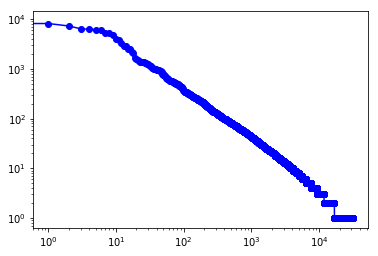

In [15]:
key = '방'

pos = tw.pos(minimal[:int(len(minimal) / 4)])
#pos = kkma.pos(minimal)
#pos = km.pos(minimal)
#pos = han.pos(minimal)
cnt = Counter(pos)

print('nchars  :', len(minimal))
print('ntokens :', len(minimal.split()))
print('nmorphs :', len(set(pos)))
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(40))
print('\nLocations of "%s" in the document:' % key)
concordance(u'%s' % key, minimal, show=True)

draw_zipf(cnt.values(), 'zipf.png')

In [16]:
i = 0
j = 0
while j < 20:
#for item in cnt.most_common(60):
    item = cnt.most_common(1000)[i]
    if item[0][1] == 'Noun':
        print(item[0])
        j += 1
    i += 1

('호텔', 'Noun')
('도박', 'Noun')
('것', 'Noun')
('카지노', 'Noun')
('이', 'Noun')
('그', 'Noun')
('년', 'Noun')
('수', 'Noun')
('의', 'Noun')
('등', 'Noun')
('때', 'Noun')
('때문', 'Noun')
('게임', 'Noun')
('박도', 'Noun')
('사람', 'Noun')
('일', 'Noun')
('돈', 'Noun')
('월', 'Noun')
('경우', 'Noun')
('를', 'Noun')


In [6]:
sent = []
for mn in minimal.split('.'):
    sent.append(tw.nouns(mn))

In [11]:
sent_short = []
mns = ''
for mn in minimal.split('.'):
    lenth = len(tw.phrases(mn))
    if lenth < 5:
        sent_short.append(tw.nouns(mn))
        mns += mn + '. '

In [14]:
len(mns)

81859

In [13]:
len(sent_short)

3405

In [8]:
len(sent)

43000

In [10]:
sent_short[19]

['그', '돈', '도박']

In [34]:
mn

' '

In [24]:
%%time
model = Word2Vec(sent_short)

Wall time: 84.8 ms


In [25]:
model.init_sims(replace=True)

In [30]:
model.most_similar('카지노')

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('도박', 0.9967072010040283),
 ('호텔', 0.9952234625816345),
 ('것', 0.9917162656784058),
 ('더', 0.9913396835327148),
 ('그', 0.9899942874908447),
 ('돈', 0.989331841468811),
 ('의', 0.9882208108901978),
 ('수', 0.987134575843811),
 ('카이지', 0.9860376119613647),
 ('강원랜드', 0.9847756624221802)]

# 단어 바꿔치기 연습 with tw_corpus

In [72]:
kkma.pos(mns.split('.')[15])

[('*', 'SW'), ('[[', 'SW'), ('롯데', 'NNP'), ('호텔', 'NNG'), (']]', 'SW')]

In [74]:
sent = []
for mn in mns.split('.'):
    sent.append(['%s/%s' % (item, jtem) for item, jtem in km.pos(mn)])

In [83]:
sent = []
for mn in mns.split('.'):
    sent.append([jtem for item, jtem in km.pos(mn)])

In [ ]:
len(sent)

In [84]:
sent[14]

['SW', 'NNP', 'JKS', 'NNG', 'XSV', 'EP', 'EC']

In [76]:
sent[19]

['--/SS',
 '그/MM',
 '돈/NNG',
 '으로/JKB',
 '도박/NNG',
 '하/XSV',
 '았/EP',
 '나/EC',
 '보다/MAG']

In [77]:
sent[104]

['*/SW',
 '맨/MM',
 '오른쪽/NNG',
 '에/JKB',
 '는/JX',
 '도박장/NNG',
 '이/JKS',
 '있/VV',
 '다/EC']

In [78]:
sent[184]

['이것/NP', 'ㄴ/JX', '도박/NNG', '이/JKS', '되/VV', 'ㄴ다/EC']

In [85]:
%%time
model = Word2Vec(sent)

Wall time: 75.8 ms


In [86]:
model.init_sims(replace=True)

In [82]:
model.most_similar('다/EC')

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('을/JKO', 0.9991925954818726),
 ('었/EP', 0.9988731145858765),
 ('있/VX', 0.9984985589981079),
 ('지/VX', 0.9984432458877563),
 ('하/XSV', 0.9983676075935364),
 ('것/NNB', 0.9982611536979675),
 ('이/JKS', 0.9980766773223877),
 ('다고/EC', 0.9980412721633911),
 ('았/EP', 0.9979169368743896),
 ('하/VV', 0.9978622198104858)]

In [87]:
model.most_similar('EC')

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('VV', 0.9988192319869995),
 ('VX', 0.9983826875686646),
 ('EP', 0.9959607124328613),
 ('JKO', 0.9952637553215027),
 ('VA', 0.9937963485717773),
 ('JKS', 0.9902042746543884),
 ('ETN', 0.9870339632034302),
 ('ETM', 0.9860033392906189),
 ('XSV', 0.9797662496566772),
 ('JX', 0.9781874418258667)]

In [91]:
km.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [62]:
sent = mns.split('.')[19]
i = 0
print(sent)
for a in tw.pos(sent):
    a = '%s/%s' % (a[0], a[1])
    print(a)
    if i < 5:
        try:
            b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
            print(tw.pos(a), tw.pos(b))
            if tw.pos(a)[0][1] ==  tw.pos(b)[0][1]:
                sent = sent.replace(a, b)
                print(sent)
                i += 1
        except:
            pass

   --그 돈으로 도박했나 보다
--/Punctuation
[('--/', 'Punctuation'), ('Punctuation', 'Alpha')] [('으로', 'Josa'), ('/', 'Punctuation'), ('Josa', 'Alpha')]
그/Noun
[('그', 'Noun'), ('/', 'Punctuation'), ('Noun', 'Alpha')] [('에', 'Josa'), ('/', 'Punctuation'), ('Josa', 'Alpha')]
돈/Noun
[('돈', 'Noun'), ('/', 'Punctuation'), ('Noun', 'Alpha')] [('다', 'Adverb'), ('/', 'Punctuation'), ('Eomi', 'Alpha')]
으로/Josa
[('으로', 'Josa'), ('/', 'Punctuation'), ('Josa', 'Alpha')] [('은', 'Noun'), ('/', 'Punctuation'), ('Josa', 'Alpha')]
도박/Noun
[('도박', 'Noun'), ('/', 'Punctuation'), ('Noun', 'Alpha')] [(')|/', 'Punctuation'), ('Punctuation', 'Alpha')]
했/Verb
[('했', 'Verb'), ('/', 'Punctuation'), ('Verb', 'Alpha')] [('는', 'Verb'), ('/', 'Punctuation'), ('Josa', 'Alpha')]
   --그 돈으로 도박했나 보다
나/Eomi
[('나', 'Noun'), ('/', 'Punctuation'), ('Eomi', 'Alpha')] [('에서', 'Noun'), ('/', 'Punctuation'), ('Josa', 'Alpha')]
   --그 돈으로 도박했나 보다
보다/Verb


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


In [42]:
for item in np.random.choice(mns.split('.'), size=5):
    print(item)
    ii = item
    for jtem in tw.pos(item):
        ii = ii.replace(jtem[0], jtem[1])
        #print(jtem[1])
    print(ii)

   그래서 도박 배당률이 85
   Adverb Noun NounJosa Number
    카지노(Casino)를 요구한다
    NounPunctuationAlphaPunctuationNoun VerbEomi
   * 카지노에서 모은 코인으로 교환한다
   Punctuation NounJosa Verb NounJosa VerbEomi
  )하여 말을 걸면 호텔에 에스테틱 룸을 설치할 수 있게 된다
  PunctuationVerb NounJosa Verb NounJosa Josa스테Suffix NounJosa Verb Noun Adjective VerbEomi
   당시 레볼루션이란 곡과 함께 선보여서 레볼루션 카지노라고 불린다
   Noun NounJosa NounJosa Adverb NounJosa Noun NounJosa VerbEomi


# 단어 바꿔치기 연습 with tw_corpus

In [92]:
from collections import Counter

def calculate_bigram(sentences):
    bigram = {}
    for s in sentences:
        context = "SS"
        for i, w in enumerate(s[1:]):
            if context not in bigram:
                bigram[context] = Counter()
            if bigram[context][w] == 0:
                bigram[context][w] = 1
            bigram[context][w] += 1
            context = w
    for context in bigram.keys():
        total = sum(bigram[context].values())
        for w in bigram[context]:
            bigram[context][w] /= total
    return bigram

In [5]:
minimal = minimal.replace(']', '').replace('[', '').replace('*', '').replace('|', '').replace("\\'", "").replace('~', '')

In [168]:
sent = []
for mn in minimal.split('.'):
    if len(tw.morphs(mn)) > 4:
        sent.append(['SS'] + tw.morphs(mn) + ['SE'])

In [169]:
bg = calculate_bigram(sent)

In [170]:
bg['SS'].most_common(5)

[('호텔', 0.024193388068306065),
 ('이', 0.022940977675287758),
 ('도박', 0.022463868954137923),
 ('그', 0.014015068683776315),
 ('~~', 0.013617478082818123)]

In [227]:
i = bg['SS'].most_common(5)[np.random.randint(5)][0]
j = 0
while (i != 'SE') and (j < 5) :
    print(i, end=' ')
    i = bg[i].most_common(5)[np.random.randint(5)][0]
    j += 1

~~ 호텔 에 대한 복수 

In [205]:
#  영문
def generate_sentence(seed=None):
    bigram = bg
    if seed is not None:
        np.random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in bigram:
            break
        words, probs = zip(*[(k, v) for k, v in bigram[c].items()])
        idx = np.argmax(np.random.multinomial(1, probs, (1,)))
        w = words[idx]
        
        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w
        
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
            
        c = w
    return "".join(sentence)

In [230]:
generate_sentence()

'도박 이 도박 묵 시 80 만원 (Mood) https :// news'

# RNN test

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.optimizers import *
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from nltk.tokenize import sent_tokenize
#from konlpy.corpus import kolaw
#from konlpy.tag import Twitter

In [31]:
doc0 = [" ".join(["".join(w) for w, t in tw.pos(s) 
                  if t not in ['Number', "Foreign"]]) for s in sent_tokenize(minimal)]

NameError: name 'minimal' is not defined

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(doc0)
doc = [l for l in tokenizer.texts_to_sequences(doc0) if len(l) > 1]

maxlen = max([len(x) - 1 for x in doc])
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
maxlen

In [ ]:
# 국문
def korean_most_common(c, n, pos=None):
    if pos is None:
        return bigram[tokenize(c)[0]].most_common(n)
    else:
        return bigram["/".join([c, pos])].most_common(n)
    
def korean_generate_sentence(seed=None, debug=False):
    if seed is not None:
        np.random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in bigram:
            break
        words, probs = zip(*[(k, v) for k, v in bigram[c].items()])
        idx = np.argmax(np.random.multinomial(1, probs, (1,)))
        w = words[idx]
        
        if w == "SE":
            break            
        
        w2 = w.split("/")[0]
        pos = w.split("/")[1]
        
        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ["Josa", "Punctuation", "Suffix"]:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w
        
        if debug:
            print(w)
            
    return "".join(sentence)

In [160]:
%%time
model = Word2Vec(sent)

Wall time: 4.84 s


In [36]:
model.init_sims(replace=True)

In [37]:
sent = minimal.split('.')[15]
i = 0
print(sent)
for a in tw.nouns(sent):
    if i < 5:
        try:
            b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
            print(tw.pos(a), tw.pos(b))
            if tw.pos(a)[0][1] ==  tw.pos(b)[0][1]:
                sent = sent.replace(a, b)
                print(sent)
                i += 1
        except:
            pass

 2000년 [[9월 11일]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사
[('년', 'Noun')] [('일', 'Noun')]
 2000일 [[9월 11일]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사
[('월', 'Noun')] [('성수동', 'Noun')]
 2000일 [[9성수동 11일]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사
[('일', 'Noun')] [('원', 'Noun')]
 2000원 [[9성수동 11원]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사
[('신라', 'Noun')] [('쉐라톤', 'Noun')]
 2000원 [[9성수동 11원]], [[쉐라톤호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사
[('호텔', 'Noun')] [('택시', 'Noun')]
 2000원 [[9성수동 11원]], [[쉐라톤택시]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


# 단어 바꿔치기 연습 with kkma_corpus

In [38]:
sent = []
for mn in minimal.split('.'):
    sent.append(kkma.nouns(mn))

In [39]:
%%time
model = Word2Vec(sent)

Wall time: 2.51 s


In [40]:
model.init_sims(replace=True)

In [64]:
sent = [mn for mn in minimal.split('.') if len(mn) < 80][9]
i = 0
print(sent)
for a in kkma.nouns(sent):
    if i < 5:
        try:
            b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
            print(kkma.pos(a), kkma.pos(b))
            if kkma.pos(a)[0][1] == kkma.pos(b)[0][1]:
                sent = sent.replace(a, b)
                print(sent)
                i += 1
        except:
            pass

  장점이라면 소음기 장착이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('장점', 'NNG')] [('보장', 'NNG')]
  보장이라면 소음기 장착이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('소음기', 'NNG')] [('화면', 'NNG')]
  보장이라면 화면 장착이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('장착', 'NNG')] [('로켓', 'NNG')]
  보장이라면 화면 로켓이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('동시', 'NNG')] [('약간', 'MAG')]
[('크기', 'NNG')] [('구조', 'NNG')]
  보장이라면 화면 로켓이 되는 동시에 꽤나 큰 구조인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('카지노', 'NNG')] [('퀀', 'UN')]
[('수', 'NNG')] [('기본', 'NNG'), ('적인', 'NNG')]
  보장이라면 화면 로켓이 되는 동시에 꽤나 큰 구조인데도 카지노에 숨겨들어갈 기본적인 있다는 점 정도? 


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


# 단어 바꿔치기 연습 with km_corpus

In [65]:
sent = []
for mn in minimal.split('.'):
    sent.append(km.nouns(mn))

In [66]:
%%time
model = Word2Vec(sent)

Wall time: 2.37 s


In [67]:
model.init_sims(replace=True)

In [68]:
sent = [mn for mn in minimal.split('.') if len(mn) < 80][9]
i = 0
print(sent)
for a in km.nouns(sent):
    if i < 5:
        try:
            b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
            print(km.pos(a), kkma.pos(b))
            if km.pos(a)[0][1] == km.pos(b)[0][1]:
                sent = sent.replace(a, b)
                print(sent)
                i += 1
        except:
            pass

  장점이라면 소음기 장착이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('장점', 'NNG')] [('정리', 'NNG')]
  정리이라면 소음기 장착이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('소음기', 'NNG')] [('대금', 'NNG')]
  정리이라면 대금 장착이 되는 동시에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('장착', 'NNG')] [('안드로메다', 'NNG')]
[('동시', 'NNG')] [('전술', 'NNG')]
  정리이라면 대금 장착이 되는 전술에 꽤나 큰 크기인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('크기', 'NNG')] [('구매', 'NNG')]
  정리이라면 대금 장착이 되는 전술에 꽤나 큰 구매인데도 카지노에 숨겨들어갈 수 있다는 점 정도? 
[('카지노', 'NNG')] [('시', 'NNG'), ('에', 'JKM'), ('라', 'NNG'), ('마', 'NNG'), ('드레', 'NNG')]
[('수', 'NNB')] [('이상', 'NNG')]
[('점', 'NNB')] [('연회비', 'NNG')]
[('정도', 'NNG')] [('이상', 'NNG')]
  정리이라면 대금 장착이 되는 전술에 꽤나 큰 구매인데도 카지노에 숨겨들어갈 수 있다는 점 이상? 


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


# 짧은 문장 학습

In [76]:
sent = []
for mn in minimal.split('.'):
    if len(mn) < 50:
        sent.append(km.nouns(mn))

In [77]:
%%time
model = Word2Vec(sent)

Wall time: 308 ms


In [78]:
model.init_sims(replace=True)

In [82]:
sent = [mn for mn in minimal.split('.') if len(mn) < 50][9]
i = 0
print(sent)
for a in km.nouns(sent):
    if i < 5:
        try:
            b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
            print(km.pos(a), kkma.pos(b))
            if km.pos(a)[0][1] == km.pos(b)[0][1]:
                sent = sent.replace(a, b)
                print(sent)
                i += 1
        except:
            pass

 ], [[양세형]], 공기탁이 추가로 불법도박 혐의로 조사받은 사실이 알려졌다
[('공', 'NNG')] [('시작', 'NNG')]
 ], [[양세형]], 시작기탁이 추가로 불법도박 혐의로 조사받은 사실이 알려졌다
[('추가', 'NNG')] [('도박사', 'NNG')]
[('불법', 'NNG')] [('사건', 'NNG')]
 ], [[양세형]], 시작기탁이 추가로 사건도박 혐의로 조사받은 사실이 알려졌다
[('도박', 'NNG')] [('이치', 'NNG')]
 ], [[양세형]], 시작기탁이 추가로 사건이치 혐의로 조사받은 사실이 알려졌다
[('혐의', 'NNG')] [('도박판', 'NNG')]
 ], [[양세형]], 시작기탁이 추가로 사건이치 도박판로 조사받은 사실이 알려졌다
[('조사', 'NNG')] [('분', 'NNG')]
[('사실', 'NNG')] [('자신', 'NNG')]
 ], [[양세형]], 시작기탁이 추가로 사건이치 도박판로 조사받은 자신이 알려졌다


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [91]:
sent = ' 역 주변에 [[파칭코]]점, 이자카야, 가라오케, 러브호텔 등 환락가가 형성되어 있다'
i = 0
print(sent)
for a in km.nouns(sent):
    if i < 5:
        try:
            b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
            print(km.pos(a), kkma.pos(b))
            if km.pos(a)[0][1] == km.pos(b)[0][1]:
                sent = sent.replace(a, b)
                print(sent)
                i += 1
        except:
            pass

 역 주변에 [[파칭코]]점, 이자카야, 가라오케, 러브호텔 등 환락가가 형성되어 있다
[('역', 'NNG')] [('등', 'NNG')]
[('주변', 'NNG')] [('운영', 'NNG')]
 역 운영에 [[파칭코]]점, 이자카야, 가라오케, 러브호텔 등 환락가가 형성되어 있다
[('파칭코', 'NNP')] [('중독', 'NNG')]
[('점', 'NNB')] [('수', 'NNG')]
 역 운영에 [[파칭코]]수, 이자카야, 가라오케, 러브호텔 등 환락가가 형성되어 있다
[('러브호텔', 'NNG')] [('사용', 'NNG')]
 역 운영에 [[파칭코]]수, 이자카야, 가라오케, 사용 등 환락가가 형성되어 있다
[('등', 'NNB')] [('벌', 'VA'), ('ㄴ', 'ETD')]
 역 운영에 [[파칭코]]수, 이자카야, 가라오케, 사용 번 환락가가 형성되어 있다


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [88]:
np.random.choice([mn for mn in minimal.split('.') if (len(mn) < 50) & ("," in mn)], size=5)

array([' 화면은 호텔 내부에서 파란색, 지하의 식당에선 검은색, 통제실 이후 빨간색이 된다',
       ' || 1982 || 라스베가스의 도박사들 || 토시 || $946,461 ||',
       ' 카지노를 중심으로 한 다양한 위락시설을 갖추고 있는 곳으로, 보통 도심지에 위치해 있다',
       '  그는 미소를 지었다, 도박에서 또 다시 승리한 것이다',
       '  롯데호텔 서울의 경우, 1979년에 본관을 세웠으며 1988년 신관을 확장했다'], dtype='<U49')

# 일단 구조를 정해놓고 바꿔치기 방식으로 문장 생성

## 여유가 생기면 tagging 후 구조 학습으로...

In [81]:
np.random.choice([mn for mn in minimal.split('.') if (len(mn) < 50) & ('http' not in mn)], size=5)

array(['  카드 놀이에 능하며 도박을 좋아하는 것으로도 나온다', ' --도박은 안가르쳐준다',
       ' --[* NBAMANIA에서는 사행성 도박을 철저하게 지양하고 있다',
       '  [[도박|훨씬 더 질이 나쁜 이유라 문제지',
       " ''아무리 무모한 도박이라도 가진 것이 없을 때는 해 볼만 하지"], dtype='<U49')

In [70]:
np.random.choice([mn for mn in minimal.split('.') if (len(mn) < 80) & ('?' not in mn)], size=5)

array(['  그래도 3성 맛집은 가온, 라연([[신라호텔]]) 단 두 군데 밖에 없다',
       ' [[1981년]] [[3월 30일]] 오전 10시경, A 호텔에 남녀가 체크인을 하고 들어갔다',
       '  이후 식음료 공급업체가 플라자호텔에서 런치벨로 바뀌었으나, 누적되는 적자를 버티지 못하고 카페객차로 전환되면서 사라졌다',
       ' 세계 최대의 호텔 그룹', ' 미국 라스베이거스 도박사들은 한국의 우승 확률은 500대1로 예상했다'],
      dtype='<U79')

In [47]:
model.most_similar('호텔')

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('아이파크', 0.6920963525772095),
 ('프레지', 0.6776541471481323),
 ('문', 0.6581095457077026),
 ('팔레스', 0.6433863639831543),
 ('랜차이즈경영학과', 0.642789363861084),
 ('앞', 0.6331616640090942),
 ('그랜드힐', 0.6263036727905273),
 ('특설', 0.6261852383613586),
 ('콘티', 0.6221438050270081),
 ('인터', 0.621733546257019)]

In [28]:
structure = []
for jtem in minimal.split('.'):
    structure.append([item[1] for item in tw.pos(jtem)])

In [29]:
sent = minimal.split('.')[0]
a = np.random.choice(tw.nouns(sent), size=1)[0]
b = np.random.choice([item for item, jtem in model.most_similar(a)], size=1, p=np.array([jtem for item, jtem in model.most_similar(a)]) / np.sum([jtem for item, jtem in model.most_similar(a)]))[0]
sent.replace(a, b)

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


'2000년 [[911월 11일]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사'

In [30]:
sent

'2000년 [[9월 11일]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사'

In [31]:
key = '호텔'
for i in range(len(data)):
    txt = '%s' % data[i]
    if key in txt:
        for item in txt.split('\\n'):
            if key in item:
                for jtem in item.split('.'):
                    if key in jtem:
                        print(jtem)
                        print()

2000년 [[9월 11일]], [[신라호텔]] 에메랄드 룸에서 열린 칠보산 송이버섯 선물 전달행사

비슷한 시각 박선호는 서울 중구 태평로 플라자호텔에서 신재순을, 종로구 내자동 내자호텔에서 심수봉을 태우고 궁정동 안가에 도착했고, 중앙정보부 부장 수행비서였던 육군 [[포병]]대령 [[박흥주]]는 [[무좀]] 때문에 잠시 시간을 내서 [[광화문]] [[에스콰이어]] 지점에서 새 [[구두]]를 샀다고 전해진다

 비밀 유지를 위해 호텔에서 오디션을 봤다는 듯

에피소드 11에서는 악몽을 보여주는 호텔에서 자신의 방을 들여다보게 되는데 무엇인지는 불명이지만 그가 그토록 두려워한 것을 보게 되었고,[* 후에 스미스는 \'\'\'"올가미 10개에 목을 매고 죽은 10명의 남자와 11번째 사람을 위해 비어있는 올가미 하나를 봤을 거라고 생각해요

그리고, 메일에 적혀있던 폐호텔 '인테그랄'의 옥상으로 향한 렌마루가 본 것은 불가사의한 힘을 사용하는 소년 키리데라 메이에게 표적이 된 타카에 뮤우의 모습이었다

 * [[1984년]] - [[김사복]]([[1932년]]~): 독일 기자 [[위르겐 힌츠페터]]를 [[광주 민주화 운동|광주]]까지 태워다 준 호텔 [[택시 기사]]

 * [[2006년]] - [[노무현]] [[대한민국 대통령|대통령]]이 [[서울]] 쉐라톤워커힐호텔에서 열린 [[민주평화통일자문회의]]에서 [[전시작전통제권]] 관련 [[부끄러운 줄 알아야지|연설을 했다

[* 한국의 호텔과 고층건물을 보면 3층 다음이 5층, 12층 다음이 14층인 경우도 있다

사카키바라 료의 법정 증인으로 작중 배경인 나카미나토 군의 가장 큰 관광 호텔의 오너로 군의 관광 사업을 좌지우지할 만큼의 영향력을 가지고 있다

 본격 호텔에 묵기 싫어지는 영화

]가 돌핀 호텔의 저주받은 객실 1408에 묵으면서 겪는 이야기를 다루고 있다

=== 호텔에 가기까지 ===

 귀신이 나온다는 호텔은 모두 찾아가면서 하룻밤을 지낸 뒤 [[그런 거 없다]]면서 공포소설 팬들을 계속 기죽

 호텔 샤워기에서 흙탕물이 나온다든지, 문맹률도 높고 실업률도 높다는 의미로 \'\'\'"말하자면, 반은 백수고 반은 까막눈이에요"\'\'\'라든지 하는 드립은, 이를테면 [[시망 사브로자|시망]] 만나서 [[시망]] 하고 있는 경기를 보는 잔재미였다

아르칸은 2000년 1월 15일 베오그라드의 5성급 인터콘티넨탈 호텔에서 23세의 부패 경찰인 도브로사프 가브리치가 쏜 총에 눈과 얼굴을 맞고 사망했다

 *호텔 626

) 또 나오고 또 최종 섹션인 호텔에서는 5명의 보스몬스터를 한 자리에 모아 놓은보스재생실에서 마지막으로 등장한다

 - 페이트 컴플리트 마테리얼3(2010년 10월 발매)] 4차 성배전쟁을 묘사한 작가의 문체가 화려하고, 전투기의 공중전이나, 호텔테러, 해안가테러, 강에서 괴수가 돌아다니는 등의 사건이 있어 4차가 커보이는 면이 있다

 [[에미야 키리츠구|테러리스트]][* 호텔을 날려 버리고 인파 한복판에서 \'\'\'마스터든 아니든 상관없다\'\'\'면서 저격질을 하는 모양새는 영락없는 테러리스트

랜서 진영: 케이네스는 키리츠구를 상대하다가 (호텔공방도, 마술회로도) 박살났고, 랜서는 캐스터 및 세이버와의 전투 때문에 웨이버를 건드릴 겨를이 없었다

 원본에 따르면 그 당시 나탈리아 생각으로는 키리츠구는 뉴욕의 호텔에 있었어야 했기 때문에 키리츠구라고 생각했는지조차 알 수 없다

 이때 배경이 되는 장소들은 마이야가 묵고있던 호텔방이나 랜서일행이 투숙중이던 하얏트 호텔의 지하주차장 등 키리츠구가 알고 있는 장소들이다

 무너진 호텔을 건축하는 장면, [[브로드 브릿지]], 화물 컨테이너가 쌓인 항구 등이 나오는데 1쿨 때 성배전쟁에 휘말려 망가진 적이 있어서 나왔다

 : 키리츠구가 호텔직원 앞에서 케이네스의 이름을 사칭할 때

 * [[간츠]] : 호텔이 무너지고 난 뒤 케이네스가 월령수액으로 자신의 몸을 감싸느라 거대한 구체가 된 채로 사람들에게 발견되자 나온 드립

  * 6화 : 호텔에서 솔라우가 방을 한 바퀴 도는 씬

 * 


 이 때 이미 현대그룹은 이곳에 28층짜리 대형건물을 지어 그룹본사의 사옥 겸 외국 바이어 전용호텔로 사용할 계획이었다

 광복 이후 박문사는 철거되고 그 자리에는 영빈관에 이어 신라호텔이 들어서면서 계속해서 엉뚱한 곳의 정문으로 남아있었다

[* 최근 경영학과로의 복수전공은 선수강 과목 이수 후 3점 중반대만 맞추면 누구나 할 수 있게 되었으며 신흥강자로 호텔경영, 언론정보, 정치외교학과가 떠올랐다

 서울의 전통있는 4년제 대학엔 별로 없는 호텔경영학과, 조리산업학과나 정보디스플레이학과, 회계세무학과같은 특성화 학과를 만든 걸 보면

 ~~신의 한수~~) 호텔경영은 경희호텔경영전문대를 흡수통합하면서 생겼기 때문에 전통대학의 4년제로서는 유일할 수밖에 없다

 세종대의 경우 전문대 시절 호텔경영학과가 생겼고 이십년 전 종합대로 승격되면서 계속 유지하고 있는 것이다

 이제 와서 규제가 풀려 새로 만들기엔 호텔경영의 인기가 식어버린 것도 있고 해서 아마 다른 전통대학에 생기는 일은 없을 지도 모른다

호텔관광대학의 경우 대학영어의 평점이 B를 넘지 않는 경우 졸업이 불가능하다

]] 다른 학과를 살펴보면 거대한 단과대인 호텔관광대학도 여학우들이 남학생의 비율을 가뿐히 뛰어넘고 이과대학의 \'\'\'[[물리학과]]\'\'\'가 남녀 성비가 1

==== 호텔관광대학 ====

 호텔관광대에서 본관쪽으로 가면 있다

중앙도서관 1층, 네오관1층, 청운관 지하1층, 오비스홀 1층, 문리과대학1층, 이과대학 동관 1층, 정경대학 1층, 크라운관 1층, 제 1 법학관 1층, 생활과학대학 지하1층, 법학관 1층, 한의학관 1층, 호텔관광대학 별관 지하1층 (타 단과대의 복사실 위치는 후에 [[추가바람]])

 서울은 순수학문, 수원이 응용학문이라 했지만 서울캠에 있는 의약계열 학과들, 생활과학대학, 호텔관광대학, 경영대학, 문과대학의 \'\'\'응용\'\'\'영어통번역학과, 정경대학의 무역학과, 이과대학의 정보디스플레이학과 등은 어떻게 봐도 순수학과라고 하기 힘들다




 돈이 많아진 케빈은 관광 천국인 뉴욕 도심지역을 마음껏 돌아다니며 구경했고, 그것마저 모자라 아빠의 [[신용카드]]를 마구 긁으며 TV 광고에서 봤던 플라자 특급 호텔 스위트룸에 묵고 룸서비스를 마구 시키는 등 호화 사치스러운 여행을 즐긴다

 호텔 예약 전화번호도 여행 떠나기 전날에 집에서 퀴즈쇼를 보다가 우연히 녹음한 내용을 듣고 알아낸 것이다

 고작 10살짜리 어린애가 생전 해본 적도 없는 호텔 예약까지 단 한 번에 성공했다는 사실도 놀랍지만, 이렇게 기상천외한 방법까지 써서 예약을 했으니 어떻게 보면 참 대단한 일

다음 날, 케빈은 호텔에서 VIP 대접을 받으며 호화로운 [[리무진]]을 타고 콜라와 치즈피자를 먹으며, 뉴욕의 화려한 도심을 구경한다

그런데 덩컨 장난감 가게에서 막 나온 케빈은 호텔에 돌아가려던 찰나 때마침 마브, 해리와 딱 마주쳤고,--세계 최대 도시에서 우연히 딱 만나다니 세상 참 좁구나

-- 도둑들에게서 벗어나 호텔로 도망친다

 그러나 이 무렵 호텔 지배인은 케빈이 사용한 신용카드가 도난신고가 되어있다는 사실을 알아내고, 이로 인해 호텔 지배인은 케빈에게 신용카드를 뺏으면서 "이 도둑질한 [[신용카드]]와 함께 경찰서로 가자

"라고 위협조로 말을 했는데, 지배인의 말에 겁을 먹은 케빈은 금방 상황파악을 하고 호텔에서 도망쳐야 했다

참고로 말해두자면, 이건 호텔 측의 최악의 실수이다

 물론 케빈이 신용카드를 멋대로 쓴 것은 잘못이지만 케빈이 호텔로 도망쳐 왔을때 나쁜 사람이 쫓아온다고 살려달라고 도움을 요청한 건 싸그리 무시해 버리고, 어린 꼬마에게 겁을 주며 협박을 했다

궁지에 몰린 케빈은 호텔에서 전편과 같은 비디오 속임수로 직원들을 따돌리고 뒷문으로 도망치지만, 케빈이 호텔로 들어가는 것을 보고 뒷문에서 기다리고 있던 마브와 해리에게 잡히고 만다

그동안 가족들은 뉴욕에 도착하여 플라자 호텔에 찾아갔고, 호텔 직원들을 상대로 이 사태에 대한 책임을 물으며, 무슨 놈의 호텔이 어린애 혼자 체크인하게 놔두냐, 이 


 * \'\'\'Alexandre Desplat - Canto At Gabelmeister\'s Peak ([[그랜드 부다페스트 호텔]] OST)\'\'\' [[https://youtu

 * \'\'\'알렉상드르 데스플라 - A Dash Of Salt ([[그랜드 부다페스트 호텔]] OST)\'\'\' [[https://youtu

 Moustafa ([[그랜드 부다페스트 호텔]] OST)\'\'\' [[https://www

 Moustafa ([[그랜드 부다페스트 호텔]] OST)\'\'\' [[https://www

 * 그랜드 부다패스트 호텔 ost

 * 그랜드 부다페스트 호텔

 * 그랜드 부다페스트 호텔

 * [[그랜드 부다페스트 호텔]] - 시즌 3~4

 주저하는 수잔을 설득하며 밋치는 노숙은 해도 호텔은 싫다며 어떻게 해서든 방을 빌리려고 하고, 아버지가 열쇠장인[* 수잔은 좀도둑이었을 거라고 확신한다]이라고 밝히며 자물쇠를 따는 킷을 가지고 있었기에 수잔의 집에 방문했다가 고양이들의 비명을 듣고 문을 따고 들어가 구급차를 불렀다고 설명한다

수상한 곳[* 조는 그곳을 콰이엇 헤이븐 호텔(Quiet Haven hotel)이라고 말한다]에서 깨어난 수잔은 아까와는 사뭇 다른 친절한 조와 만나게 되는데, 객실 내부의 방으로 들어가 아이비라고 추정되는 형체 앞의 거울을 작동시켜 비추면 거울에 흉한 모습의 괴물이 보이게 된다

[* 다운폴에서 조와 아이비가 묵게 되는 호텔의 이름이다] 그리고 수잔은 복수에 성공한다

 호텔리어로 현재 아이때문에 휴직중이나 일자리를 잃기 전에 복직하기 위해 베이비시터를 찾고 있다

 2000/200으로 열흘에 본전을 뽑는 호텔 싱글룸 다음가는 효율을 보여준다

  * 호텔방-싱글, 더블, 스위트룸의 3개가 있으며 싱글은 2성, 더블과 스위트는 3성부터 사용가능하다

 호텔을 지을경우 반드시 관리실을 지어줘야하며(관리실의 경우 철거가 안되니 짓는장소를 신중히 정할것), 청소가 안될경우 바퀴벌레가 출몰해 평가가 곤두


돈 파올로가 변장한 모습이며, 호텔에 머무르고 있었다

바로넷 호텔의 활발한 종업원

남쪽 대로에 있는 바로넷 호텔의 지배인

 예전에는 일류 호텔의 요리장이었다고 하며, 그 실력은 확실히 대단하다

 피해자가 묵고 있던 호텔의 벨보이

 피해자가 묵고 있던 호텔의 청소원

 호텔의 지배인

유적이 있는 지역의 유일한 호텔을 경영하고 있다

 알바로의 호텔에서 일하는 니코의 소꿉친구

니코와 같은 고향 출신으로, 알발로의 호텔에서 일하고 있는 소녀

2014년 《[[그랜드 부다페스트 호텔]]》에서 호텔 지배인 무슈 귀스타브 역을 맡았다

 라일리의 부탁을 받아서 호텔 옥상에 갇혀있는 레인저들을 구출해주면 유니크 미니건인 [[유진(폴아웃3)|유진]]과 이것중 둘 중 하나를 선택할 수 있다

 게다가 약간의 꼼수를 이용하면 둘다 얻을수도있다! 라일리스 레인저를 호텔에서 탈출시키는 퀘스트를 할 때 유니크 미니건을 운용하는 병사의 미니건을 [[V

 거기다 베논 광장과 병원, 호텔에는 슈퍼 뮤턴트들이 득실거리며, 맨 윗층에는 마스터급이나 오버로드 같은 놈도 튀어나온다

그렇지만 무엇보다 레퀴엠의 대미궁에는 아이템을 가져올 수 있기 때문에 [[호텔의 밖]]에서 방어아이템을 +25쯤 강화해두고 30층에 도달할 때까지 HIGH한 DIO를 만나거나, 푸치신부한테 방어 아이템이 털리거나[* 물론 털려도 즉시 족치면 괜찮다

[[호텔의 밖]]을 클리어 하고 [[베네치아 호텔]]에서 떨어진 [[디아볼로(죠죠의 기묘한 모험)|디아볼로]]는 여전히 똑같은 호텔인 것에 의문을 품다가 방금 자신이 떨어져서 부서진 바닥의 구멍으로 들어가자 그곳 또한 던전이었다

 호텔의 밖에서 볼 수 없었던 여러가지 요소들이 등장하는데 동료, 몬스터 하우스, [[위험한 물건]], [[신데렐라(죠죠의 기묘한 모험)|신데렐라]], [[무디 블루스]]등의 디스크들이 처음 등장하며, 미식별 상태로 떨어지는 기억 디스크나 [[크레이지 다이아몬드|디스크]][[DIO의 뼈|의 합성]]같은 시스템도 활용할 수 있게 

 * 신인 오리엔테이션에 불참해서 5천달러의 벌금을 물었는데, 표면적 이유는 \'\'\'늦잠을 자서\'\'\'였는데, 실제로는 구단관계자 외 일반인 출입을 금지하는 오리엔테이션이 열리는 호텔에 월드 피스가 친구들을 데리고 온 것

 남쪽 대륙에 새로 추가된 폐허가 된 금륜제 호텔에서 출몰하는 투명 현상범

 투명 몬스터라 발견하기 위해서는 기본 아이템인 i고글에 열추적장치를 달아야 하며 열추적장치는 금륜제 호텔에서 프로그램을 받을 수 있다

 전투중 모습을 숨기면 공격이 제대로 맞지 않기 때문에 호텔 주방에서 정체불명의 스프를 얻어다 뿌려야 한다

 여담으로 금륜제고스트를 잡아서 현상금을 타면 금륜제 호텔 가이드를 맡는 퀘스트가 발생하고 이 퀘스트는 금륜제 호텔 살인사건이라는 미니 스토리로 바뀐다

]의 구르메 카지노[* 연일 100조엔의 돈이 오가고 10성급 호텔&음식점이 줄을 서있다

) 크리스틴을 따라 뉴욕에 왔으며, 호텔로 보내진 인형에 크리스틴이 기겁한 이유를 아는 유일한 인물

 별명은 \'엘 차포 구스만(El Chapo Guzmán))이 마사틀란의 호텔에서 체포되었다

com/watch?v=TzTmpsoyjD8|칸쿤 호텔 존에서 집회를 하던 시민이 경찰에 체포]]되는 사태가 벌어졌다

여담이지만 시위대가 근처의 가장 대도시 [[아카풀코]]에 왔던 날, 도시의 호텔 예약이 70%나 취소되었다고(

 * 밀리언 달러 호텔 (2000)

] 멜로 일당의 거처를 알아낸 뒤[* 정확히는 슈나이더가 멜로의 거처를 편지로 써서 미사가 묵고 있는 "헐리우드의 홀리 샤토 호텔 1504호"로 보내도록 조종했다

|| [[파일:호텔킹 OST Part

jpg|width=100]] || \'\'\'호텔킹 OST Part

 [[호텔킹]]OST \'기다려본다\'가 나왔다

 * [[호텔 더스크의 비밀]] - [[멜리사 우드워드]]

NDS용 게임 [[호텔 더스크의 비밀]]의 등장인물

[[분류:호텔 더스크의 비밀 시리즈의 등장인물]]", 'contributors': ['


G : 호텔 - 장비 스캔 - 주력 전차, 보병전투차량

 라운드 시작 시 해변 점령지들이 모조리 중립인 반면 러시아는 내륙의 호텔, 공사장 등의 점령지를 점령한 상태로 시작하기 때문에 중,후반 러시아의 기갑물량공세를 미군이 도저히 버텨내질 못한다

 어찌어찌 한개 내지 두개 분대가 우회해 공사장, 호텔 등의 점령지를 먹어도 해변 점령지들과 본진에서 쏟아져 나오는 러시아 기갑이 곧바로 점령지를 되찾으러 오기 때문에, 미군 입장에선 정말 쉽지 않다

여담으로 호텔 지점의 엘레베이터 안에서 [[배틀필드 2]]의 MEC 메인 테마가 들린다

호텔 기지를 점령하면 \'호텔 기지를 점령했다\'는 보이스 파일이 없기 때문에 전작에서 나왔던 기지 점령 보이스가 나온다

] 운전하면서 VIP가 있는 호텔로 향한다

]으로 호텔에 가는데 이게 웬 일

호텔에는 다름아닌 중국 특수부대가 진을 치고 있었다

 그리고 호텔 내부로 갈 때 웃긴점은 정면으로 걸어가도 아무도 건들지 않는다는 점

 호텔 정문도 병사들이 지키고 있다

이들의 임무는 코빅 요원과 중국인 부부(한나와 그 남편)를 구출하는 것이며, 호텔 꼭대기 층까지 올라가 이들과 조우한다

 * 백석생활관 : 남자 272실, 여자 604실 총 수용 인원 1743명 (2인 1실) 의 대형 기숙사로 호텔형 기숙사를 표방하고 있는 만큼 보안수준과 시설은 굉장히 좋은편이다

2014년부터 2018년 까지 5년간 50억 억원의 국고 지원을 받아 관광, 호텔, 외식, 항공, MICE, 카지노, 의료, 크루즈, 지역관광등 관광 전 분야에서 요구되는 전문 인력을 배양합니다

호텔경영학전공 (★ - 중등학교 정교사(2급) 관광)

참고로 신축되는 기숙사는 호텔 리조트처럼 생긴 건물인데 가장크고 높은 건물인 본부동보다고 높고 크다고 한다 (대략 17층) 완공되면 국내 최대 단일기숙사로 1,700~1,800명이 기숙사에 살 수 있다고 한다

 [[식당]]이나 [[호텔]]의 [[서빙]] [[아르바이트]]도 마찬가지

결국 활동 중단에 들어갔고


 [[엘자 마리아]]를 사야카에게 양보한 후에도 그녀가 걱정되어 결계 밖에서 줄곧 지켜보다가 사야카가 위기에 처하자 곧바로 뛰어들어 구해주고, 실리적 동맹 관계이던 호무라를 저지하면서까지 사야카를 살해당할 위기에서 또 구하고, 방황하는 사야카를 굳이 찾아 헤매고, 사야카의 시신을 굳이 수습하여 호텔에 들어가 마력으로 보존하고,[* 예전 마도카가 사야카의 소울 젬을 버렸던(…) 사건을 떠올렸던 듯, (한때 사야카였던 존재인) 옥타비아를 처치하면 사야카의 소울 젬을 되찾을 수 있을지도 모른다는 실낱 같은 희망을 품었기 때문으로 보인다

 지하철 안내방송에서는 \'천연온천 스파디오\'([[캡슐호텔]])가 있다고 알려준다

역 주변에는 사쿠라노미야 공원, 오사카시립 종합의료센터, 제국호텔 오사카, 오사카 어메니티 파크 등이 있다

역 주변에는 후쿠오카 야마노우에 [[호텔]], 미나미 [[공원]], [[세븐일레븐]] 등이 있다

이진칸 호텔 살인사건에서 김전일에게 결정적 단서를 제공함과 동시에 범인에 의해 장렬한 최후를 맞는다

참고로, 만화책이 아닌 애니메이션 버전에서는 이진칸 호텔 사건에서 범인의 습격을 받고 죽는 대신 사경을 헤매다 나중에 깨어나는 것으로 설정되어 있다

=== [[이진칸 호텔 살인사건]] ===

 그래서 이번에는 아이를 노렸고 그것도 여의치 않아 미유키를 노려 호텔로 데려가 [[검열삭제]]를 하려다가 미유키에게도 차인다

[* 그 방법이 4편에서 처키의 첫날밤을 방해한(?) 러브호텔의 커플이 티파니에게 끔살당했을 때와 똑같이 위에 있던 유리가 박살나면서

데뷔작은 2005년의 [[고쿠센]]2로 이후 한국의 드라마를 리메이크한 것으로 알려진 호텔리어나 만화 원작인 [[워킹맨]] 등에 출연하였다

 * 호텔리어

 * 러브호텔즈

 비교적 저렴하면서도 창문 뷰가 좋은 호텔은 \'\'H\'mong Sapa Hotel\' 이니 참고하도록 하자

 일반적으로 작은 호텔에는 에어컨이 없다

 가격은 두버스 모두 공식홈페이지 에서 편도 17$이나 운이좋으


 2013년 8월에는 경인일보 사옥을 신축해서 벨류 호텔 하이엔드가[* 밴티지 호스피탈리티 그룹 계열로 한국에는 수원에 처음 진출했다] 들어왔다

사실 호텔들이 많은 이유는 바로 [[삼성전자]] 때문이라고 한다

||<#BDBDBD> ② || [[갤러리아]]백화점, 이비스앰배서더 [[호텔]] 방면 || ||

 게다가 원래 수원역의 맹주인 [[애경그룹]]에서도 가만있질 않아서, 수원역 북측 공간을 확장하여 별관(AK&)과 호텔(노보텔 앰배서더)을 지었다

||<#00bfff><:>{{{#ffffff 공항버스}}}||<:>[[공항버스 4100|4100]]||수원종합터미널·이비스호텔·'''영통

랜드마크호텔 방면'''||

호텔캐슬 방면'''||

|| [[부평역|부평]] || [[수원역]]ㆍ웃거리ㆍ[[상록수역]]ㆍ[[한양대학교/ERICA캠퍼스|한양대]]ㆍ예술인아파트ㆍ중앙동ㆍ군자단지ㆍ라성호텔ㆍ안산역ㆍ시화ㆍ월곶ㆍ대야동ㆍ소사동ㆍ부천역ㆍ일신동 || [[태화상운]] || 10~15분 || GBIS 조회 가능 ([[시외버스 737|737]]) ||

 인근에 외국인 전용 호텔이 몇 개 있기 때문인지 외국인 관광객도 흔히 보인다

 * [[호텔]]

 * [[비즈니스 호텔]]

 * [[캡슐호텔]]

  * [[쉐라톤 그랜드 워커힐 호텔]]

 * [[호텔신라]]

 * [[호텔롯데]]

 * [[휘닉스 평창|휘닉스 호텔앤드리조트]]

 * ~~[[인사이드 파크 호텔]]~~ 

 --물론 신청 대기열이 밀리면 얄짤없이 구관에 떨어진다-- (되도록이면 웅지관 써라 ㄹㅇ 시설 개오진다 참고로 호텔처럼 방에 키를 꼽고 빼는 형식) 

영화 \'[[내가 살인범이다]]\'를 조례사거리와 에코그라드호텔에서 촬영하였다

 * 웰빙건강계열(3개): 커피바리스타 & 외식조리과, 호텔관광과, 뷰티케어(피부미용)과

 결국 국적 논란에 불매운동까지 일어나자 [[신동빈]] 회장이 [[호텔롯데]] 상장을 시작으로 지주회사 체제로 단계적 전환하겠다는 입장을 발표했다

] 일본 광윤사 - 일본롯데 

||1932[* [[1932년]] [[11월 18일]] 개최, 1931년 8월 1일에서 1932년 7월 31일 사이에 개봉한 영화를 대상으로 선정]||[[그랜드 호텔]](Grand Hotel)|| ||

 * 2015년 87회 - [[그랜드 부다페스트 호텔]]

 브라질에 도착한 아카드와 세라스는 호텔에서 묵게 되는데 밀레니엄의 사주를 받은 현지 무장[[경찰]]들이 아카드를 죽이기 위해 호텔을 포위하게 된다

 브라질 호텔에서 경찰특수부대원 중 한명이 문으로 도망치려하자 문을 닫는데 이용한다

 브라질에서 호텔에 들어갈 때 프론트 직원에게 한 번, 엘리베이터로 도망가는 경찰 특수부대원에게 한 번 사용했다

역 주변에는 일본생명 아카바네바시 빌딩, [[도쿄타워]], [[이탈리아]] 대사관, [[오스트리아]] 대사관, [[쿠바]] 대사관, [[파푸아뉴기니]] 대사관 등이 있으며 숙박시설로는 도쿄 프린스호텔이 있고 그 외에 시바 공원이 있다

 예를 들면 엘더스크롤 4: 오블리비언의 경우 각 도시의 가이드 서적들이 대부분의 정보는 정확하지만 저자가 선민의식, 민족주의 성향이 있어서 같은 것을 다뤄도 임페리얼족에게 관련된건 무조건 유리하게, 타민족에게 관련된건 무조건 불리하게(한 동네에 여관이 두개 있으면 임페리얼족이 운영하는건 7성 호텔급으로, 타민족이 운영하는건 홍콩행 게이바 마냥 적어놓거나 등) 서술한 경우도 있었다

 * 혹시 [[아카사카 프린스 호텔]]을 찾아오셨나요?

{'namespace': '0', 'title': '아카사카 프린스 호텔', 'text': 'グランドプリンスホテル赤坂

그랜드 프린스 호텔 아카사카

[[일본]]의 [[호텔]]

그러나 [[태평양 전쟁]]이 끝난 후, 경제적으로 생활이 어려워진 의민태자가 1954년 세이부 그룹 측에 매각했고, 세이부 그룹은 이 저택을 호텔로 개조해서 1955년에 영업을 시작했다

1980년대까지는 연예인이나 스포츠 스타들의 결혼식장으로 인기를 끌었으나 2000년대 들어서는 새 초특급 호텔들의 등장으로 인기를

html|제주도에서 열린 군 홍보행사를 마친 후 \'\'\'하루 숙박료가 60만원을 넘는 모 호텔 스위트룸에 숙박\'\'\'했음]]이 드러나면서 더욱 비판여론이 거세지고 있다

 파견근무를 나가 본 예비역이라면 알겠지만 현역 군인은 파견근무시엔 저렇게 호텔은 커녕 동네 여관에서 머무는 것이나 노숙조차 불가능하고 오직 \'\'\'파견지 근처의 군부대\'\'\'에서 숙식을 해결하는 것이 원칙이다

 * [[호텔 더스크의 비밀]] - [[카일 하이드]]

 * [[몬스터 호텔]] - [[드라큘라]][* 아내 마사가 인간들에게 살해당했으며 드라큘라는 이 일로 인해 인간들을 혐오하게 된다

 일본장기연맹 소속 장기 5단 기사인 타케와키가 호텔에서 시체로 발견된다

 * [[롯데월드타워]]/[[류경호텔]] - 롯데월드타워가 기어이 류경호텔의 높이를 추월해버리자 북한은 완전히 열폭한 나머지 되도 않는 개소리를 늘여놓고 있다

nhn?category=baseball&ctg=news&mod=read&office_id=076&article_id=0002390125&redirect=true|직접 만들어 준 전력도 있었고]] 이후 운영 팀 과장으로 재직하던 2004년 11월 1일에는 [[현대 유니콘스]]의 [[2004년 한국시리즈|한국시리즈]] 우승 축하연을 위해 직접 호텔로 달려가서 준비했다고 전해진다

 (비 오는 날 호텔까지 뛰어가서 준비했다고

] 반포동 소재 M모 호텔[* 실제 인터뷰 영상에서 이 호텔의 이름이 두번 언급되었다

 주인공 회사의 거래회사의 호텔맨

해안가 마을에 있는 호텔 정상에 파티장을 보면 [[Deadmau5|유명한 헬멧을 쓴 DJ]]가 있으며, 이 DJ를 가격해서 ~~뜯어낸다~~얻는다

 수건은 호텔에 있는 수영장에 있는 옥상에서 추락하는 방법이 가장 쉬운 편이긴 하지만 호텔 뒤쪽의 환풍구 위로 점프하면 호텔 중간에 있는 환풍구에 도착한다

이것도 콜라보레이션으로 해안가 마을에 있는 호텔 근처 골목에 있는 컨테이너 위에 있는 토스터위에 올라가면 빵이 

2014년 5월 4일에는 [[인사이드 파크 호텔]]을 한 채 짓기도 했다

실은 그의 정체는 '''카일에게 익명으로 레드스타를 찾아달라는 부탁을 한 의뢰인'''이자 본작에서 중요한 위치를 차지하고 있는 인물인 마이클 맥베인과 케이프 웨스트 호텔에서 13년전 살해당한 캐시 맥베인의 '''아들'''이다

그리고 조사 끝에 윌은 모친을 죽인 진범인 죠지는 이미 죽었으며 범행현장인 호텔은 진범의 처인 마가렛 패트리스가 사들여 아파트로 만들었다는 것, 그리고 25년 전 호텔에 숨어 들어온 금고털이의 아들이 살고 있었다는 것이다

 그 결과 카일은 25년전 호텔에서 살해당한 금고털이범이 자신의 아버지란 사실을 알게 된다

[[분류:호텔 더스크의 비밀 시리즈의 등장인물]]", 'contributors': ['bergamot', 'ForAiur', 'namubot', '121

 * 주식회사 호텔 오퍼레이션 시스템즈

 2014년 [[그랜드 부다페스트 호텔]]에서는 강렬한 악역 조플링으로 출연해 씬스틸러를 담당했다

 * [[그랜드 부다페스트 호텔]](2014) - 조플링 

이렇게 생겨먹은 구장의 센터 가장 깊은 곳으로 날아간 타구였기 때문에 평균적인 외야수가 정상수비를 하는 데 저정도 타구면~~[[박노준|인사이드 파크 호텔]]~~[[장내홈런]]의 가능성이 굉장히 높았다

그러다가 때마침 미국 소유의 우주호텔에 도킹하려던 미국 우주 비행선과 마주치면서 찰리와 웡카 일행을 외계인으로 오인한 미국 국방부와 이런저런 충돌이 일어날 뻔 하지만, 호텔에 잠입해 있던 \'\'\'우주 최흉의 [[전투종족]] 왕꿈틀이\'\'\'[* 눈을 제외하고 다른 부위는 보이지 않으며, 온몸이 근육으로 이루어져 있어 몸의 형태를 자유자재로 바꿀 수 있다

암살될 때 부인은 상태가 나빠서 [[호텔]]에 있고 매킨리 혼자 행사장에 갔는데, 총에 맞은 후에도 "아내와 함께 오지 않은게 다행이었다

 문화어로는 류경(柳京)[* [[류경호텔]]의 그 류경 맞다

1970년에는 웨스틴 호텔이 유나이티드의 지주


 사건의 흔적조차 남기지 않는 전설적 킬러, 봉민정(송지효)은 은퇴작으로 자체발광 꽃미모로 여심킬러라 불리는 TOP스타 최현(김재중)의 제거를 의뢰받고, 그가 투숙한 호텔로 잠입해 납치에 성공 한다

한편, 변태 시골형사 마반장([[오달수]]), FBI 출신 특수요원 신팀장([[한상진]])은 현상금 1억원이 걸린 전설의 킬러가 떴다는 제보를 받고 호텔에 잠입하고, 꽃미남 스타 스폰서 안젤라([[김성령]]) 역시 최현을 만나기 위해 호텔로 향한다

그 뒤 자허는 이런저런 제과점과 레스토랑을 옮겨다니다가 빈에 '카페 자허'라는 매장을 내고, 나중에 그의 아들인 에두아르트 자허가 그 카페를 개축하여 호텔을 올렸는데, 이게 지금도 빈에 있는 '호텔 자허'다

 카페 자허는 호텔의 일부로 아직 남아 있고, 당연히 자허토르테를 제조하고 판매하는 곳 역시 이 카페다

하지만 이 케이크로 대박을 쳤던 호텔 자허는 에두아르트의 아들 에드문트가 사장을 역임하던 1930년대에 [[세계 대공황]]으로 인한 재정난에 허덕이고 있었고, 이 때 황실에 과자류를 만들어 진상하던 유서깊은 과자점 데멜(Demel)에서 호텔 자허에 회생 자금 지원을 대가로 자허토르테의 조리법과 판매권을 사들였다

 [[카리야 테츠]]는 [[맛의 달인]]에서 호텔 자허 사장의 딸과 데멜 과자점 사장의 아들이 결혼하면서 데멜 쪽으로 조리법이 새어나갔다고 주장했지만, 이는 낭설로 밝혀졌다

[[제2차 세계대전]] 후 호텔 자허는 데멜로부터 다시 자허토르테의 판매권을 사들이려고 했지만 데멜에서 거부하면서 실패했고, 결국 호텔 자허와 데멜 사이에 7년 여 동안 법정 소송이 이어졌다

 이 때문에 지금도 호텔 자허와 데멜은 각각 자신들의 자허토르테에 오리기날 자허토르테(Original Sacher-Torte), 데멜의 자허토르테(Demel's Sachertorte)라는 이름을 붙여 각자 팔고 있다

 같은 도시의 유서 깊은 호텔인 임페리알 호텔은 자허토르테의 아성에 도전하기 위해 호텔 이름을 딴 '임페리알 토르테(Im

 좀 큰 팬션의 경우도 1박에 기본 10여 만원 이상 부르는데[* 얼마나 비싼지 감이 안 온다면 호텔 부킹 사이트를 통해 비교해 보자

 비수기에는 값이 내려가기도 하지만 이 정도 값이면 최소 해외 유명 도시 3성~4성 호텔 수준의 값이다

  * [[힐베르트의 호텔]]

] 결국 나중에는 찬우의 철저한 두뇌 플레이에 따라 프린스 호텔이 1차 부도까지 가게 되어 권선징악이 뭔지 톡톡히 보여주긴 하지만

] 건달들과의 격투신과 추격전도 꽤 볼만했으며 특히 엄청난 비즈니스 능력으로 대명그룹의 실세로까지 급부상하고 이재하의 프린스 호텔을 압박하는 내용은 그야말로 압권

] 지금은 아예 프린스 호텔 사장에 앉혀놓고 필요할 때 행동대장 역할을 맡기고 있다

 D동 바로 옆에 있는 삼호호텔에서 사거리 건너에 수족관 하나가 더 있으니 총 10개소다

 주로 [[스페인]], [[포르투갈]] 등 [[이베리아 반도]] 국가 출신 청년들이 일자리를 찾지 못하고 과거 식민지에 언어가 통하는 마카오로 가기 시작했으며 한국에서도 호텔경영학과, 관광학과 등을 중심으로 마카오로 해외취업을 하는 사례가 늘기 시작했다

 다만 버스 정류장은 가까운 편으로, 프리마호텔 정류장에서 하차하여 바로 나오는 골목길로 들어와 바로 틀면 나온다

[[영동대교]] 남단 근처에는 프리마 호텔, 리베라 호텔, 엘루이 호텔이 있다

 엘루이 호텔에는 클럽 엘루이가, 리베라 호텔에는 나이트클럽인 H20(에이치투오)가, 프리마 호텔 건너편에는 클럽 앤써가 위치해 있어 금요일, 토요일 밤이면 다음날 새벽까지 20대 남녀가 많이 돌아다닌다

 호텔 레스토랑 보조의 보조였지만 같은 나이의 주방장이 들어오면서 짤리고 우연한 기회에 청담동 최고의 레스토랑 Piace에서 매니저로 일하게 된다

] 영업시간이 아닐 때는 지은과 언니 동생 하는 편한 사이[* 지은의 있는 척을 위해 자신의 비싼 옷이나 가방도 서슴없이 빌려주고 상엽에 관한 여러가지 정보도 알려주며 거품 목욕 한 번 해보는 것이 소원인 지은을 위해 호텔 스위트룸도 

약간의 시간이 지난 후 약해진 오피스를 가지겠다며 [[하데스(하이스쿨 D×D)|하데스]]가 보낸 상당한 수의 [[그림 리퍼]]의 군세가 습격해오게 되었고 르페이와 아자젤로부터 이 의사공간의 결계를 유지하는 장치가 호텔의 주차장에 있다는 사실을 알아낸 잇세가 아자젤에게 [[하데스(하이스쿨 D×D)|하데스]]의 [[쿠데타]]와 영웅파의 진의를 현 4대 마왕과 [[천계]]의 4대 [[세라프]]에게 보고하여 도움을 요청하는 임무를 받은 [[시도 이리나]]와 조조에 의하여 부러진 [[뒤랑달|엑스 뒤랑달]]을 수리하기 위해 천계로 가려고 하는 [[제노비아(하이스쿨 D×D)|제노비아]]가 [[르페이 펜드래건]]의 도움으로 동료들 먼저 이 의사공간을 무사히 탈출하자마자 리아스, 아케노, 키바, 아자젤과 함께 전위로 나서면서 그 결계 장치를 파괴하고 오피스를 데리고 이 의사공간을 빠져나가기 위해 그림 리퍼들을 여유롭게 단숨에 쓰러트리며 분전하면서 주차장으로 향하는 한편 쿠로카는 [[토죠 코네코]]와 [[아시아 아르젠토(하이스쿨 D×D)|아시아 아르젠토]], [[레이벨 피닉스]], 그리고 사마엘의 저주에 걸려 빌빌거리고 있는 상태의 [[발리 루시퍼]]와 함께 호텔 상층 창가에서 후위에 있게 되었고 아시아가 전위 멤버들에게 원거리 회복 아우라를 날려 그들을 회복시키고 발리가 후위에서 그림 리퍼 부대에게 거대한 [[마력탄]]을 날려 다수의 그림 리퍼를 날려버리는 등 전위 멤버들을 지원해주는 역할을 맡는 동안 쿠로카는 아직 데미지를 완전히 회복하지 못한 탓에 코네코와 레이벨의 부축을 받으면서 통째로 강력한 방어 마방진을 만들어 자신들이 위치해 있는 방 통째로 후위 멤버를 보호했다

24권 오페라편의 묘사를 보면 [[뮌헨]]에서 콩쿨을 마치고 호텔에서 축하 와인을 마시다가 쿠로키가 뭔 짓을 한 듯

[[호텔 카디널]]의 평범한 여사원이지만 그 실체는 쿠루시마 흥업의 대표이사인 [[쿠루시마 타이조]]의 손녀

 호텔 카디널의 라운지에 들어갈 바텐더를 찾기위해 헤드헌팅중 사사쿠라 류를 만

 ~~2달러짜리 맥주가 부러우면 가보던가~~그래도 호텔 고층이라 분위기는 끝내준다

 일본의 유명 유도 선수인 이노우에 코세이와 사귀고 결혼했는데, 결혼 소식을 알렸던 호텔은 화재가 났고 이노우에는 올림픽 유도팀에 들어가지도 못했으며, 히가시하라가 올림픽 경기를 관람했을 때 일본 유도팀은 모조리 죽을 쒔다(

 - 업무에만 충실한 모습을 보이며, 호텔에서 007을 언급했다가 본드에게 제압당하는 등의 모습을 보인다

 * 한여름 호텔 수영장 - 파란 펩시맨의 최초 등장

[* 배트컴퓨터 데이터의 아캄시 스토리에서 코플팟 가문과 웨인 가문의 악연에 대해 이야기하고 있는데, 웨인 가문과의 호텔 사업 경쟁을 위해 무리하게 사업을 확장하다 펭귄의 아버지 대에서 사업 자체가 무너지면서 펭귄이 암흑가에 몸을 담게 되었다고 한다

 [[미국]]의 [[공무원]]인 [[라피어]](LaPiere)는 1935년에 미국으로 여행을 온 [[중국인]] 부부를 대동하고 중국인 부부를 위해 통역사 역할을 해 주며 미국에 있는 250개의 호텔과 레스토랑을 방문하였는데, 이 부부가 서비스를 거부당한 것은 단 한 번 뿐이었다

 라피어는 그들이 방문한 호텔과 레스토랑 주인들에게 손님으로 중국인을 받겠는지 편지로 물어보았는데, 이전 연구와 비교했을 때 의외의 결과가 나왔고 이들 중 절반이 답변했고 그 중 90%가 중국인 손님을 받지 않겠다고 답하였다

 한때 유럽에는 "호텔에 일본인 관광객들이 왔는데 [[훈도시]] 차림으로 여직원들 앞을 돌아다닌다거나 돈을 그 속에서 꺼내 결제한다더라" 같은 이야기가 떠돌기도 했었다

 * 호텔이나 백화점에서 일하는 직원들은 [[부자]]일 것이다

 이름도 본래는 크리스토포로 콜롬보[* 제노바에는 이 이름의 공항과, 호텔이 존재한다

 실제로 미국의 영향을 장기간 받지 않을 수 있었던 구 공산권 국가의 경우, 호텔에서까지 직원과 영어가 안 통하기도 한다

 * [[몬스터 호텔 2]] - [[데니스]][* 마비스와 조니의 5살짜리 아들이다

 * 호텔 안 또는 앞에

 1993년도에 지하층 보일러실에서 수증기 폭발사고가 발생하여 방한 예정이던 빌 클린턴 미국 대통령의 숙박이 취소 되었으며 투숙객들이 인근 호텔로 이전하는 사건이 있었다

 인천국제공항 앞의 \'그랜드 하얏트 호텔 인천\'은 2014년 8월 30일까지 \'하얏트 리젠시 호텔 인천\'이었다가 West Tower 확장으로 같은 달 31일에 \'그랜드 하얏트\'로 승격되었다

 인천 쪽 호텔의 운영주체는 [[한진그룹]] 계열사인 (주)KAL호텔네트워크

 체인에 따라 포시즌스/만다린 오리엔탈 에서 힐튼/콘라드 수준의 그레이드를 왔다갔다 거리는 Luxury Grade 호텔

 홍콩에는 콘라드 호텔 옆에 위치해있다

 만다린 오리엔탈처럼 젠 스타일의 인테리어와 수준급의 서비스를 제공하며, "샹그리라\'라는 이름처럼 대부분의 호텔이 동양적 분위기를 띠고 있다

 캐나다 계열의 호텔

 한국으로 치면 신라 호텔과 대략 비슷한 분위기를 생각하면 되나, 분위기는 더 고급스럽다

 규모와 놀이 시설로 밀어버리는 호텔을 기대하고 온다면 포시즌은 예약을 안 하는 게 좋다

][* 라스베가스 포시즌도 다른 카지노 호텔 (만달레이베이 호텔) 건물에 입주해 있으며, 자체 카지노가 없고 건물 카지노를 이용한다]

 시설이 화려하지 않은데 값은 또 극악스러우니 왜 여기가 인지도가 있는가 의문을 두는 사람들도 있는데 꼼꼼하고 친절한 서비스가 이 호텔의 특징이다

 여행 중 정말 난감할 때 프론트 데스크에 이야기하면 호텔에서 도와줄 수 있는 것이 있다면 최선을 다해서 도와준다! 나이 지긋한 분들과 오거나 조용하게 쉬기를 원하면 포시즌 호텔이 좋은 대안이 될 수 있다

 아시아 관광객이라고는 기껏해야 일본인 정도로 세계 관광지마다 떼거지로 깽판 치는 중국인 관광객을 호텔에서까지 보기 싫다면 포시즌을 가는 것도 괜찮다

] 특이한 점이라면 여타 호텔에 흔히 있는 마일리지 / 포인트 제도가 이곳에는 없다

 \'포시즌스 호텔\'이라고 하는데 이게 웬 [[커튼 월|유리궁전]]이 조감도로 나와서[* 포


“{{{#FF003F 영호 퍼시픽 호텔 사건}}}”의 후속기사에서 각 언론사는 위장잠입 요원중 한명이었던 유상일  경위의 얼굴과 신상을 공개하여 논란을 빚었던 바 있다

수년동안 방치되어 있던 ‘영호 퍼시픽 호텔’이 재오픈 소식을 알리며 화려한 부활을 예고했다

 {{{#FF003F “영호 퍼시픽 호텔”은 8년 전 “선진화파 소탕작전” 후 압류되어 폐허 상태로 버려져 있었다

{{{#FF003F 한때 영광을 누렸던 영호 퍼시픽 호텔도 이제 새 옷을 갈아입고 다시 사람들을 맞이하려 한다

}}} 과거 사랑받았던 호텔로서의 그 영광을, 부디 되찾길 바란다

[* 교외 거주자들이 많아서 막차가 끊기면 택시비보다 비즈니스호텔 숙박료가 더 싸게 먹힌다

[[몬스터 호텔|몬스터]] [[몬스터 호텔 2|호텔]] 시리즈가 배경입구가 바로 [[회전문]] 입구다

 유명한 사건으로는 [[조양은|양은이파]]가 [[신상사]]파를 기습한 1975년 1월 2일 벌인 사보이 호텔 습격사건이 있다

 이것이 조폭간 싸움에서 최초로  다만 [[조양은]]은 [[김태촌]]이 무교동 엠파이어 호텔 주차장에서 오종철을 담근 것이 최초라고 주장한다

 운영주가 하나그룹이고 하나투어에서 20년 마스터리스 계약을 맺어 2016년 5월 티마크그랜드 호텔로 영업을 시작한다

역 주변은 '캐널타운 효고'로 명명된 재개발지역으로 고베 루미나스 호텔, 고베시립 효고도서관 등이 있으며 [[고베 고속철도]]의 [[다이카이역]]이 가깝기는 하지만 환승은 안 된다

이때 [[르페이 펜드래건]]과 [[고그마고그]]가 자신들이 싸우고 있는 곳으로 갑자기 난입하여 [[발리 루시퍼]]에게 부탁받은 전언을 조조에게 전하는 것에 이어서 뒤늦게 잇세 일행에게 합류한 [[로스바이세]]까지 합류하자 조조가 축제의 시작으로는 아주 좋다고 하면서 \'\'\'"야사카를 구하고 싶다면 오늘 밤 니죠성으로 와라!"\'\'\'라는 말만 남기고 간부 3명과 함께 니죠성으로 돌아가자 그후 잇세는 [[오컬트 연구부]] 2학년 멤버들 전원과 아자젤,

 하지만 이 둘도 로즈는 어찌 됐든 자신이 원하는 일을 했고, 원하는 일을 이뤘으니 이제 더이상 문제 될 게 없다는 것과 서로가 비슷하다는 걸 서로 인정하고, 결국 호텔에 들어올 때 추지 못한 춤을 추게 되고 드디어 오랫동안 풀지 못한 갈등을 해결하게 된다

> 호텔 자리 - 공격감소 

 주 획득처는 북쪽 주택가와 호텔자리

 주 획득처는 호텔 자리와 겐지로 연못

>주로 호텔의 스위트 룸을 이야기 한다

 5부 [4/19] 호텔에서 온 신호를 여러 번 확인했다

 5부 [5/19] 호텔에서 온 신호를 제대로 분석했다

 "영호 퍼시픽 호텔입니다!"\'\'\'

>거래장소인 호텔 지하실에 숨어든 유상일

>급한 대로 암호를 호텔 밖에 전달한다

>호텔 밖에서 번민하던 배준혁은 최재석이 보낸 암호를 캐치한다

>경찰과 진압 병력은 일제히 호텔로 진입을 시도한다

 에피소드 8에서는 결국 오메가 전함을 끌고 버섯왕국으로 와서 피치를 납치하며, ~~이때 마리오일행에게 편지를 남겨 호텔마리오를 한 컷신 통째로 패러디했다

{'namespace': '0', 'title': '고려호텔', 'text': ' * 관련 문서: [[마천루/북한]]

[[평양직할시]] [[중구역]] 동흥동 창광거리에 위치한 북한의 대표적인 숙박시설 양각도국제호텔과 아울러 북한의 대표적 고급호텔에 속한다

구글 지도를 보면 알겠지만 오른쪽 고려호텔 동쪽에 [[김일성 광장]]과 [[인민대학습당]]이 있는데 레스토랑에서 전망이 가능하다고 한다

 웨스틴 조선호텔 등의 국내 대기업 등에 인수되거나, 힐튼호텔, 메리어트호텔 등의 외국 기업에 인수되어 운영될 가능성도 있고~~ Marriott Hotel Pyeongyang?~~, 아니면 [[대구백화점]]처럼 평양권의 지역 기업으로 살아날 수도 있다

 * 한국에 같은 이름을 가진 호텔이 여럿 있다

 가장 인지도가 있는 곳은 [[부천시]] 상동에 있는 고려호텔

[[분류:호텔]]', 'contributors': ['ankun', 'boba7561', 'F

[[김준(웃어라 동해야)|김준]]과 [[홍혜숙]]의 외아들로, 능력이 있어 호텔의 부지배인으로 있지만 자기보다 낮은 사람을 비웃는 인간이 덜 된 놈

처음부터 동해를 눈엣가시처럼 여기고 있었지만 사태가 점점 드러남에 따라 동해와 [[윤새와]]가 자기 눈을 피해가며 호텔에서 아직도 연애하는 중이라고 착각해, 겉으로는 나름대로 사와 공은 구별하면서도~~공과사는 개뿔~~ 내심 동해를 잡아먹을 듯이 별렀다

동해의 어머니 [[안나 레이커]]가 조필용의 외동딸이라는 걸 안 후 승계 문제가 불확실해지자, 호텔 승계를 확정짓기 위해서 호텔 이익이 50%나 상승했는데도 더 실적을 올려야 한다며 직원들을 닥달하는 중이다

 또한 140화에서 카멜리아 호텔이 탈세혐의로 조사받은 건 도진과 선우가 국세청에 몰래 신고했기 때문인 것으로 추정된다

 영화에서 나올 법한 멋드러진 프로포즈로 레스토랑에서 비싼 요리와 함께 디저트에 반지를 넣는 이벤트를 준비했으나, 정작 [[정혜윤]]이 디저트를 먹다 반지가 목에 걸려 하임리히 법으로 겨우 수습한 안습적인 상황에, 기껏 준비해 놓은 호텔 스위트룸은 뜬금 없는 혜윤의 엄마 [[이들자]]의 난입으로 제대로 써보지도 못하고 도망치듯 나오는 등 '뭘 해도 안될 놈은 안 된다' 식의 안습인생이다

 급기야 5화에서는 정훈의 엄마 은경이 호텔에서 호화스럽게 할 결혼비용은 다 이쪽이 준비할테니, 혼수만이라도 네가 구해와라 하면서 받은 혼수 예단 목록[* 기본이 명품가방인 눈 돌아가는 목록

 하지만 그 다음장면에서 불륜 상대인 여자와, 호텔에 들어가는 모습까지 찍히고

 간호조무사인 혜진이 병원 원장인 [[남도현]]과 불륜 관계라는 사실을 알고, 호텔방으로 들어가 도현을 반 협박식으로 자기 딸 혜진과 결혼시켰다는 것에대해서 성형외과 원장 사모님 만들어줬다는 자부심까지 가진다

 여교사 정도면 얼마든지 더 좋은 집안 남자 잡을 수 있다면서, 자기 딸 인생에 대핸 아랑곳 하지도 않고 기를 쓰고 [[하정훈]]을 떼어놓으려고 한다[* 이 덕에 1화에서 정훈이

 * 모리모토 신타로는 이미 쟈니스 주니어였던 형 [[모리모토 류타로]]를 비롯한 가족들과 함께 호텔 식당에서 식사를 하고 있었는데, 로비에서 우연히 쟈니 사장과 마주쳤다

 콘서트 때문에 지방으로 이동하는 경우에는 버스로 이동하며, 3~4인 1실 정도로 현지 호텔에서 숙박하는 것이 보통이다

 호텔 점거 사건이나 사이타마 사변에 참가하면서 [[마크 네모]]에 타고 있는 존재가 나나리라는 것을 모른채 그녀와 대적한다

 동업자이자 여친인 여자와 호텔에 갔는데, 호텔에 [[호랑이]]가 있질 않나, 도망쳐서 밖으로 나왔는데, 포크레인이 자신을 덮쳐 땅에 묻으려하질않나, 구덩이에서 빠져나오니 조폭들이 자신을 공격하질 않나, 도망쳐서 택시에 타서 "어디든 좋으니 튑시다"라고 하자 택시기사 혼자서 튀질 않나(

[[추신수]]는 이날 귀국해 서울 소공동 롯데호텔 37층 가네트 스위트(Garnet suite)룸에서 귀국 기자회견을 가졌다

[[안산시]]가 주최한 \'대형 참사의 극복과 공동체 회복을 위한 안산국제심포지엄 2015\'가 이날 호텔인터불고 안산 그랜드볼룸에서 열렸다

2015년 9월 [[메카]]에서 발생한 크레인 붕괴 사고와 연이어 인근 호텔 화재 사건이 발생했는데, 여기서조차도 테러를 저지르니 하늘이 노하셔서 그렇다는 댓글부터 사고가 발생한 건 알라의 뜻이니 순종하고 죽으라는 등 [[http://m

[* 최대한 가격을 싸게 한 패키지 여행같은게 아닌 고급 호텔에 수백 이상을 쓰는 여행을 말한다

둘이 같이 호텔에 묵을 때는 다른 캐스트들의 [[벨튀|방의 초인종을 몰래 누르고 도망가는 장난]]도 쳤다고

둘이 호텔에 같이 묵게 되면 다른 캐스트들이 있는 방의 초인종을 누르고 ~~튀는~~ 도망가는 장난을 쳤기도 했다고 한다

 * 미국의 우주 호텔 개발사인 비글로 에어로스페이스가 Bigelow Expandable Activity Module, 약칭 BEAM 모듈을 설치하였다

 [[패밀리 레스토랑]]이 뭔지도 잘 알려지지 않았던 시절에 [[TGIF]]가 입점해


B터미널과 C터미널 사이에는 공항 내 유일한 호텔인 메리엇(Marriott) 호텔이 위치해 있다

|| [[호텔스닷컴|호텔스컴바인]] || 호텔스컴바인 - '조건 비교'편 || [[https://youtu

[[한국인 독일호텔 퇴마 살인사건]]을 다뤘다

 사건 당일 일행은 목사에게 아침 8시를 조금 넘겨 전화를 걸어 자신들이 투숙하는 호텔로 상황 설명도 없이 급히 와달라 하였고, 호텔에 도착한 목사는 바닥에 누워있던 여성의 손에 멍이 들어있어 의사를 부르려 했지만 일행은 영적인 문제라며 만류했다

사건이 발생한 호텔에 투숙하기 전 독일에 처음 도착했을 때 일행 구성은 고인(방송용 가명 이미라[* 정리를 위해 인물들을 언급할 때 방송에 등장한 가명을 사용한다

 어른들은 명품 판매나 호텔 법인을 통해 취업 비자를 신청하는 것으로 생활할 방법까지 정하고 [[2015년]] [[8월]] 김씨가 먼저 독일 현지에서 살 집을 구해놓고 [[10월 28일]] 이미라와 민지영의 가족을 데리고 일행은 독일에 입국했다

김씨는 이미라와 민지영은 물론 다른 지인들에게도 자녀를 미국에 유학보낼 정도로 돈 문제를 겪지 않았지만 사업 문제로 경제적 어려움을 겪게 되었다고 말하고 다녔고, 사람들에게 자신이 독일에서 호텔이나 음식점 같은 사업을 하겠다고 하였고 현지에서 사업 비자를 받기 위해 변호사도 선임하였다

 무한 호텔

  무한개의 객실이 있는 호텔에서, 손님이 더 오면 어떻게 해야할지 풀어야 하는 문제다

||동청주점 || 청원구 충청대로 114 (율량동 500-3) ||둘째, 넷째주 일요일 ||'''내덕자연시장''', 라마다플라자 청주호텔 지하에 입점해있다

{'namespace': '0', 'title': '호텔왕게임', 'text': ' * 상위 문서: [[보드 게임]]

호텔왕게임류에 속하지는 않지만 같은 방식의 [[보드 게임]]으로는 "마블킹덤 골프"가 있으며, 여기서는 도시 대신 이름 그대로 전 세계의 주요 [[골프장]]을 소재로 하고 있다

내부는 주거시설 900여


2016학년도부터 전체 5학급 중 1학급이 (20%) 호텔컨벤션 전공으로 배정되며 신입생 대상이다

 1학년 호텔컨벤션과로 처음 만났다면 3학년 졸업시까지 반이 변하지 않고 무조건 같은 반으로 간다는 이야기

 호텔 및 컨벤션에 대한 전공교육을 목표로 하고 있다

 --호텔･컨벤션과에서 호텔컨벤션과로

 호텔컨벤션과와 마찬가지로 과거와 다르게 입학시 통합모집이 아니라 전공별 모집이기 때문에 1, 2, 3학년이 모두 동일전공으로 진학하게 된다

|| [[공항버스 7000|A7000]] || [[안산터미널]] || 안산역ㆍ시흥관광호텔ㆍ시화이마트ㆍ모아A || [[인천국제공항]] || ||<bgcolor=#4ea346> [[태화상운|{{{#fff 태화}}}]] ||

||  [[공항버스 7002|A7002]] || 안산터미널 || 안산역ㆍ시흥관광호텔ㆍ시화이마트ㆍ모아Aㆍ시흥학습타운ㆍ소사역 || [[김포국제공항]] || ||<bgcolor=#4ea346> [[태화상운|{{{#fff 태화}}}]] ||

 [[무궁화호]] 같으면, 또는 마산행 같으면 이 정도로 근성열차 축에는 못 끼겠지만 이 녀석은 KTX 이전 시대의 그야말로 "달리는 특급호텔" 대접을 받던 전성기 새마을호였다

[[1912년]]부터 조선철도호텔을 설계한 [[독일인]] [[건축가]] 게오르그 데 라란데(George de Lalande)가 설계에 착수하였으나 [[1914년]]에 기초설계만 남긴채 사망하였고, 그 뒤에는 [[일본인]] [[건축가]]인 노무라 이치로(野村一郞), 구니에다 히로시(國枝博) 등이 청사의 설계를 완성했다

다니엘과 리예화의 결혼식[* 망명을 위해 한 결혼이었으나, 정식으로 밴쿠버에서 결혼하는데 하객들에게 청첩장과 더불어 항공권, 호텔 1박까지 왔다

 당시에는 김포공항에서 리베라호텔, 잠실 롯데월드호텔을 경유해 워커힐호텔까지 갔으며, 7대가 40분 간격으로 운행했다

 * 1995년 12월에 리베라호텔 미경유 및 동서울터미널 경유로 변경되었다

 * 2003년경에 '잠실롯데월드 - 

 지어졌을 당시에는 세계 최대의 호텔이었다

 우리나라에서는 호텔 자체보다는 설립에 얽힌 일화가 유명한데 다음과 같다

노부부가 악천후를 뚫고 여러 호텔을 전전했으나 하나같이 빈 방이 없어 곤란을 겪고 있었다

 그런데 어느 호텔의 웨이터가 빈 방은 없으나 괜찮으시면 자신이 사용하던 방에서 주무시는 것은 어떻겠냐는 제안을 했고 노부부는 친절함에 깊은 감동을 받았다

 다음날 아침에 노부인이 당신같은 사람은 최고급 호텔의 주인이 될 자격이 있다고 했고 젊은이는 친절한 인사로 화답했다

 젊은이는 노부부가 뉴욕에 머무르는 동안 여기서 지내게 해주려는 것인지 생각하였으나 노부부는 그 날의 친절함에 대한 보답으로 막 설립한 이 호텔의 사장직을 젊은이에게 선사했다

 이 젊은이가 훗날 호텔업계에서 명성을 날리게 되는는 조지 볼트이다

GTA 4[[리버티 시티(HD 세계관)|에서는]] 니콜스 호텔(The Nicoise Hotel)이라는 가명으로 등장한다

[[분류:호텔]][[분류:뉴욕 주]]', 'contributors': ['gaepakchinae', '218

 당시 가맹점은 평양호텔, 창광외국인숙소식당, 네거리상점 등 13개였다

[[나래카드]]를 사용할 수 있는 가맹점은 2010년 첫 도입 후 2년 만에 평양의 전 구역으로 확대돼 주요 호텔과 식당, 외화상점, 슈퍼마켓, 모든 손전화봉사소(휴대폰판매소) 등 120곳을 넘었다

 * 이글스의 호텔 캘리포니아라는 노래를 굉장히 좋아한다

 2018 수능대비 개때잡 확통 5강 35분부터는 실제로 캘리포니아의 한 호텔에 와있는 듯한 느낌을 받을 수 있다

[[류경호텔]]

 * [[류경호텔]]

 * [[양들의 침묵|A Friend For Dinner]] - 호텔 직원(붉은 옷에 모자) 변장을 하고 5명의 타겟을 푸주칼(Cleaver)로 들키지 않게 암살한 다음 시체 발견되기

 * [[아메리칸 싸이코|I\'m Utterly Insane]] - 호텔 직원(붉은 옷에 모자) 변장을 하고 2명의 타겟을 들키지 않게 익사시킨 

오랫동안 신규 아파트 분양이 없던 수정동에 건설되는 중소형 평수로만 구성된 700세대가 넘는 아파트 단지로서, 장차 [[북항재개발]] 지역에 건설될 [[협성마리나 G7]] 레지던스/호텔과 함께 북항재개발 구역과 인접하고 있는 아파트 단지가 될 예정이다

>파티나 호텔에 쓰일 음식을 배달하려고 한 것 같긴 하지만, 어떤 까닭인지 불안하게 다가왔다

 전후에는 이혼하고 호텔에서 일하다 1997년 뒤셀도르프에서 암으로 사망했다

 * [[파르나스호텔]]

 신동욱이 다리를 절면서[* 당시 호텔에서 탈출하던 과정에서 위에서 뛰어내리다 다리를 다쳤다

부모와 함께 맞선 장소라는 호텔의 별채로 향하는 히요리

 APEX 측에서 제공하는 호텔은 바퀴벌레가 나올 정도로 안좋아 해외팀이 제대로 기량을 발휘할 수 있는 환경이 아니며, 한국팀들이 자신들의 스크림을 돌려보는 것 같다는 음모론까지 주장했다

 우선 본국에 있는 게이밍 하우스를 이용하는 것보다 호텔을 이용하는 것이 불편할 수는 있으나 서울시 내에 있는 호텔에서 바퀴벌레가 나올 정도의 시설을 가진 호텔은 적으며, 만약 있다면 금방 문을 닫을 것이다

 문제는 엔비어스도 같은 호텔을 이용하는데 호텔 생활의 어려움을 토로할지언정 호텔 시설에 불만을 토하지는 않았다

 팬이 없는 멤버는 1~2시간 멍 때리다 호텔로 돌아가는게 일상

무엇보다 이러한 경비증가는 심각한 수준이 되어가고 있는데, 악수회에 참가하는 멤버가 330명 가까이 되는데 이들에 대한 비행기, 신칸센, 호텔값을 생각하면 엄청난 마이너스

 특히 Free Bird는 [[이글스]]의 [[호텔 캘리포니아]]와 함께 대표적인 트리플 기타의 명연으로 손꼽힌다

포스터는 주인공 벤저민이 로빈슨 부인과 호텔에서 밀회를 가진 뒤 다음날 떠날 준비를 하는 장면을 캡쳐한 것으로, 역대 미국 영화 포스터 걸작 중 하나로 꼽힌다

31 서진 作 <하트 브레이크 호텔> (102호)

우선 [[롯데호텔]] 면세사업부와 [[신영자]] 롯데장학재단 이사장의 저택이 2016년 6월 2일 압


그런데 실제로 칼날도 안통할 정도에다가, 내지르는 순간 호텔 방 하나를 초토화 시키는 주먹을 가지고 있다

)으로 극복한 상태였기에, 당사자인 미호를 빼놓고 둘이서 강변에서 난투극을 벌이다 호텔로 직행, 교제하게 되었다(

 일본팀이 독일에 갔을 때, 호텔 로비에서 에리카 외에는 아무도 감싸주지 않는다면서 돌려달라고 마음으로부터 울고 있었다(

스토리 상 반드시 하게 되는 프랭클린의 호텔 암살 임무의 이익을 극대화 시키려면 호텔 암살 임무를 하기 전에 이 미션을 전부 끝내놓자

미션 시작 전 RPG를 구하지 못했을 경우[* 보통 공략을 보고 플레이한다면, 블리츠 플레이를 하기 전에 무조건 해야 하는 호텔 암살 미션의 이익을 극대화 하기 위해 이 미션을 하게 될텐데, RPG를 아뮤네이션에서 구입할 수 있는 시점이 하필이면 블리츠 플레이 이후다

 ~~MC 꿈나무~~ 우현이 MC를 맡아 팬들의 궁금증을 타파하고자, 호텔에 투숙중인 멤버들의 방에 침입해 기습 질문을 요청하고 갔다

{'namespace': '0', 'title': '한화 리조트', 'text': '#redirect 한화호텔앤드리조트

||<-2><:>노선||<-4><:>[[인천국제공항]](13A) - 하얏트호텔 - 국립인천공항검역소 - 덕교동 - 용유역 - 무의도입구 - 거잠포회센터 - 잠진도||

 걸작이나 호텔에 의존할 필요가 없는 독특한 관광 문명으로, 위인과 교역로만 얻을 수 있다면 온 세계가 메카에 성지순례를 오게 될 것이다

=== 파도소리호텔 ===

 * 뉴 월드 센터 호텔: 63층 / 264m, [[홍콩]]

이것이 아니고도 인스타그램이나 SNS에서 [[북한]]에 대해 여러 번 언급하며 나름 호의적인 발언을 해 ~~[[류경 호텔]] 올라갈려고 하나~~ 언제 북한에 정보를 넘겨도 이상하지 않을 상황인데다, 철통보안을 뚫고 잠입에 성공했으며 영상을 허가없이 공개했다는 점에서 충분히 주의 인물로 찍힐 만해서, 대한민국 입국 금지 유언비어가 먹혀들어간 듯

28, [[그랜드 워커힐 서울|

 [[강원대학교]] 교수/한국호텔외식경영학회 회장

=== 호텔계 ===

 * 이영재 - 호텔경영(학사)

 롯데호텔 제주, 롯데호텔 울산 총지배인 

 * 심영철 - 호텔관광경영(석사)

 오크우드 프리미어 코엑스 호텔 총지배인

 * 박용순 - 호텔경영(학사)

 오크우드 프리미어 인천 호텔 총지배인

 * 이근직 - 호텔경영(석사)

 * 장덕상 - 호텔경영(학사)

 * 오세인 - 호텔경영(석사/박사)

 세종호텔 총지배인 

 * 박종열 - 호텔경영(학사)

 춘천세종호텔 총지배인

 * 최광준 - 호텔경영(학사)

 * 김명희 - 호텔경영(학사)

 * 이정자 - 호텔경영(학사)

 前 [[강원대학교]] 교수[* 1975년 당시 최연소 강원대학교 교수]/前 한국관광학회 이사/前 한국호텔외식관광경영학회 회장[* [[http://www

 * 신민정 - 호텔경영(학사)

 드라마 <[[호텔킹]]> 출연

 * [[강래연]] - 호텔경영(학사)

 * 김서경 - 호텔경영(학사)

 * [[최자]] - 호텔경영학과(학사)

 세종호텔 건립, 국내 최초의 호텔경영학과 신설 등 호텔 관광산업 발전에도 기여했다

 1948년 10월 [[서울특별시]] [[중구(서울)|중구]] [[충무로]] 2가 82번지 소재[* 現 세종호텔 위치] 제헌국회의원 회관 건물을 신교사로 개축 완료하고 해당 건물에 학교를 이전하였다

 1968년 2월 관광개발과와 대한민국 최초의 호텔경영과를 신설했다

 학부 과정은 1987년 행정학과, 수학과, 물리학과, 전산과학과, 정보처리학과, 응용통계학과, 1995년 영상만화과, 1996년 전자공학, 건축공학, 토목공학, 컴퓨터공학과, 1997년 신문방송학과, 기계항공우주공학부, 영화예술학과, 1998년 생명공학과, 1999년 신소재공학과, 2009년 에너지자원공학과, 2012년 바이오자원공학전공, 정보보호학과, 자유전공학부, 국방시스템공학과, 2013년 항공시스템공학과, 원자력공학과, 2014년 호텔외식관광프랜차이즈경영학과를 신설했다

 19

 특히 [[카우딕크루]] 멤버들과 왕래가 잦은편인데, 2017년 [[G-STAR]] 참여를 위해 부산 [[벡스코]]에 모인 카우딕크루의 호텔 숙소에서 이루어진 [[https://www

 37화에서는 스오우와 아메이저의 싸움으로 집이 무너졌는데 처음에는 세이지를 까는 말에 아들을 감싸줬으나 거액의 돈과 집의 신축 약속, 그리고 호텔에서 숙식 제공을 받기로 하고 바로 세이지를 팔아넘긴다(

1탄에서, 2012년에 중국에 촬영을 하러갔던 무한도전 팀을 자신이 묵었던 호텔에서 만났던 이야기를 했다

 크루즈비용은 호텔숙박비+이동비용이 굳는 것이다

 또 움직이는 그 바다의 호텔은 밤중에 이동하고 있는 중이다

 이런 문제는 대개 의장 업체들이 턴키 방식으로 수행하는데, 한국의 가구, 인테리어, 호텔 업체들은 이 시장에 관심조차 없다

그런데 정작 나중에 강조된 건 위에 주석에도 언급된 '''안락함'''인지라 웹툰에서 라헬도 파울러의 '''안락함'''과 아트로포스의 '''성능'''을 합쳤으면 좋겠다고 말했다 --[[야마토(함대 컬렉션)|호텔?]]--

''' --공인 호텔--

 리사는 가는 도중에도 "호텔 프론트를 통해서 구입한 게 아니라 야매로 구입한 건데, 위험하지 않을까?"라며 의구심을 드러내지만, 케이트는 "원래 다 그래! 호텔들은

"[* 호텔로 제대로 된 투어사를 찾아 예약하면 비싸기 때문이다

\'\'\' 이어지는 38화에서 \'\'\'[[죄는 씻을 수 있습니다|각종]] [[한국인 독일호텔 퇴마 살인사건|종교와]] [[진돗개교 3세 아동 살인 사건|관련된 범죄자들]]\'\'\'을 [[해리 하트|잡몹삼아 학살하는데]], 범죄자를 4명 남겨둔 상황에서 그 중 범죄자 한 명이 사 기범을 인질로 잡자 십자검을 버리고 무릎을 꿇은 채 살해당할 위기에 처한다

 2017년 8월 30일 워커힐 호텔에서 열린 제30회 월드미스유니버시티 미인대회에서 축사를 한다고 나갔을 때에도 \'\'\'대학시절 친구들이 여기 나간다고 준비할 때 나는 도서관에서 공부하고 있었는데 오늘

 JU호텔 상무

각 동의 1층 [[로비]]는 [[호텔]] 스타일의 로비 시설로 구성되어 있으며, 각 동의 공동현관에는 [[홍채인식]] 시스템이 있다

||<:>'''발생 장소''' || [[소말리아]] [[모가디슈]] 사파리 호텔 인근 / 메디나 지역(10월 14일) [br] 나사 하블로드 호텔 / 호텔 인근(10월 28일) ||

2017년 10월 14일 폭발물이 실린 트럭이 모가디슈 중심부 사파리 호텔 인근 사거리에서 자폭해 첫 폭발이 발생했고 2시간 뒤 인근 지역에 빠르게 돌진한 뒤 자폭해서 또 다른 공격이 일어났으며, 그로인해 호텔 건물은 물론 정부 청사 건물과 일부 외교 공관 건물도 파손된 것으로 전해진다

10월 28일 소말리아 대통령궁 인근 '나사 하블로드' 호텔의 출입구 근처에서 차량 폭발이 일어났고, 잠시 후 첫 폭발이 일어난 곳 근처에서 두 번째 폭발이 발생했다

 경찰은 이 호텔의 내부에서도 총격 소리가 들리고 있다고 말했다

 현지 보안 관계자는 알 샤바브 무장 조직원들이 차량 폭발 직후 호텔로 들어가 사람들에게 총격을 가하고 있는 것으로 추정하고 있다

HTML|#]] 20명 넘는 사람들이 호텔 꼭대기 층에 숨어있는 무장 테러범들에게 인질로 잡혀있다고 말했다

||오오모리 마유미 (大森まゆみ)||고급 호텔 건설|| ||

||미나즈키 유메 (水無月ゆめ)||호텔 건설|| ||

||아사나미 메이아 (浅海 めいあ)||호텔 건설|| ||

||D코 (D子)||고급 호텔 건설|| ||

||호텔||<)>★★★☆☆||<)>3||<)>10||<)>2,500,000 CR||

||고급 호텔||<)>★★★★★||<)>3||<)>10||<)>30,000,000 CR||

||호텔||<)>-||<)>16||<)>32||<)>48||<)>48||<)>16||<)>-||<)>-||<)>2||<)>160||

||★☆☆☆☆||호텔 침실||-||호텔 존재||야간에 소등||

||★★☆☆☆||호텔 욕실||-||클럽 그레이드 2, 호텔 존재||야간에 소등||

|

In [32]:
data[:120]

[{'contributors': ['namubot', 'R:hoon12560'],
  'namespace': '0',
  'text': '#redirect 느낌표\n',
  'title': '!'},
 {'contributors': ['anatra95',
   'chkong1998',
   'Iviyuki',
   'kirby10',
   'max0243',
   'namubot',
   '110.46.34.123',
   '121.165.63.239',
   '218.54.117.149'],
  'namespace': '0',
  'text': '[[파일:3444050440.jpg]]\n([[신 세계수의 미궁 2]]에서 뜬 !!아앗!!)\n{{{+1 ！！ああっと！！ }}}\n\n[[세계수의 미궁 시리즈]]에 전통으로 등장하는 대사. [[세계수의 미궁 2 제왕의 성배|2편 제왕의 성배]]부터 등장했으며, 훌륭한 [[사망 플래그]]의 예시이다.\n\n세계수의 모험가들이 탐험하는 던전인 수해의 구석구석에는 채취/벌채/채굴 포인트가 있으며, 이를 위한 채집 스킬에 투자하면 제한된 채집 기회에 보다 큰 이득을 챙길 수 있다. 그러나 분배할 수 있는 스킬 포인트는 한정된 만큼 채집 스킬에 투자하는 만큼 전투 스킬 레벨은 낮아지게 된다.\n\n 1. 채집용 캐릭터들로 이루어진 약한 파티(ex: [[레인저(세계수의 미궁 2)|레인저]] 5명)가 수해에 입장한다.\n 1. 필드 전투를 회피하면서 채집 포인트에 도착해 열심히 아이템을 캐는 중에...\n 1. \'\'\'!!아앗!!\'\'\' ~~라플레시아가 나타났다!~~\n \'\'\'이때 등장하는 것은 [[FOE(세계수의 미궁 시리즈)|FOE]]는 아닌 일단 필드 졸개지만, 훨씬 위 층에 등장하는 강력한 졸개이며 선 턴을 빼앗긴다!\'\'\'\n 1. \'\'\'[[으앙 죽음|떡잎]]\'\'\'(hage)\n\n작품마다 !!아앗!!의 세세한 모습은 다르다. 그 악랄함은 첫 등장한 작품이자 시리즈 중에서도 불친절하기로 정평이

# 위키 카테고리

In [33]:
with open('../../Downloads/kowiki-latest-all-titles-in-ns0', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [34]:
len(lines)

776087

In [35]:
lines[0]

'page_title\n'

In [36]:
lines[100]

'(99942)_2004_MN4\n'

In [37]:
lines[100000]

'고급_프로그래머블_인터럽트_컨트롤러\n'

In [38]:
lines[100000:100010]

['고급_프로그래머블_인터럽트_컨트롤러\n',
 '고급_프로그래밍_언어\n',
 '고급_호스트_컨트롤러_인터페이스\n',
 '고급군사학교\n',
 '고급시계\n',
 '고급언어\n',
 '고급오디오부호화\n',
 '고급전원관리\n',
 '고급좌석버스\n',
 '고긍명\n']

### pdf는 python으로 읽지 않은 것으로..

# corpus 사용하기

nchars  : 18884
ntokens : 4178
nmorphs : 1499

Top 20 frequent morphemes:
[(('의', 'J'), 396),
 (('.', 'S'), 340),
 (('하', 'X'), 291),
 (('에', 'J'), 283),
 (('ㄴ다', 'E'), 241),
 (('ㄴ', 'E'), 223),
 (('이', 'J'), 221),
 (('을', 'J'), 211),
 (('은', 'J'), 184),
 (('어', 'E'), 176),
 (('를', 'J'), 148),
 (('ㄹ', 'E'), 134),
 (('하', 'P'), 124),
 (('는', 'J'), 117),
 (('법률', 'N'), 115),
 ((',', 'S'), 99),
 (('는', 'E'), 97),
 (('있', 'P'), 96),
 (('되', 'X'), 94),
 (('수', 'N'), 91)]

Locations of "대한민국" in the document:
0	대한민국헌법 유구한 역사와
9	대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에
98	총강 제1조 ① 대한민국은 민주공화국이다. ②대한민국의
100	① 대한민국은 민주공화국이다. ②대한민국의 주권은 국민에게
110	나온다. 제2조 ① 대한민국의 국민이 되는
126	의무를 진다. 제3조 대한민국의 영토는 한반도와
133	부속도서로 한다. 제4조 대한민국은 통일을 지향하며,
147	추진한다. 제5조 ① 대한민국은 국제평화의 유지에
787	군무원이 아닌 국민은 대한민국의 영역안에서는 중대한
1836	파견 또는 외국군대의 대한민국 영역안에서의 주류에
3620	경제 제119조 ① 대한민국의 경제질서는 개인과


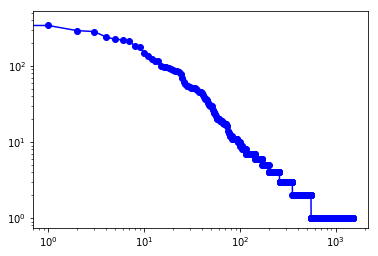

In [39]:
doc = kolaw.open('constitution.txt').read()
pos = Hannanum().pos(doc)
cnt = Counter(pos)

print('nchars  :', len(doc))
print('ntokens :', len(doc.split()))
print('nmorphs :', len(set(pos)))
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))
print('\nLocations of "대한민국" in the document:')
concordance(u'대한민국', doc, show=True)

draw_zipf(cnt.values(), 'zipf.png')

#  txt로 변환한 소설 읽기

In [40]:
with open('../../Downloads/김동인-약한_자의_슬픔-창조.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [41]:
lines

['약한 자의 슬픔\n',
 '김동인\n',
 '1\n',
 '가정교사 강 엘리자베트는 가르침을 끝낸 다음에 자기 방으로 돌아왔다. 돌아오기는 하였\n',
 '지만 이제껏 쾌활한 아이들과 마주 유쾌히 지낸 그는 찜찜하고 갑갑한 자기 방에 돌아와서\n',
 '는 무한한 적막을 깨달았다.\n',
 '‘오늘은 왜 이리 갑갑한고? 마음이 왜 이리 두근거리는고? 마치 이 세상에 나 혼자 남아 있\n',
 '는 것 같군. 어찌할꼬. 어디 갈까. 말까, 아. 혜숙이한테나 가보자. 이즈음 며칠 가보지도 못\n',
 '하였는데.’\n',
 '그의 머리에 이 생각이 나자, 그는 갑자기 갑갑하던 것이 더 심하여지고 아무래도 혜숙이\n',
 '한테 가보여야 될 것같이 생각된다.\n',
 '“아무래도 가보여야겠다.”\n',
 '그는 중얼거리고 외출의를 갈아입었다.\n',
 '‘갈까? 그만둘까?’\n',
 '그는 생각이 정키 전에 문 밖에 나섰다. 여학생간에 유행하는 보법(步法)으로 팔과 궁둥이\n',
 '를 전후좌우로 저으면서 엘리자베트는 길로 나섰다.\n',
 '그는 파라솔을 받은 후에 손수건을 코에 대어서 쏘는 듯한 콜타르 내음새를 막으면서 N통,\n',
 'K정 등을 지나서 혜숙의 집에 이르렀다.\n',
 '그리 부자라 할 수는 없지마는, 그래도 경성 중류민의 열에는 드는 혜숙의 집은 굉대(宏大)\n',
 '하지는 못하지만 쑬쑬하고 정하기는 하였다.\n',
 '그 집의 방의 배치를 익히 아는 엘리자베트는 들어서면서 파라솔을 접어서 마루 한편 끝에\n',
 '놓은 후에,\n',
 '“너무 갑갑해서 놀러 왔다 얘.”\n',
 '하면서 혜숙의 방으로 뛰어들어갔다. 그는 들어서면서, 혜숙이가 동모(同某) S와 무슨 이\n',
 '야기를 열심으로 하다가 자기 온 것을 알고 뚝 그치는 것을 알았다.\n',
 '‘S는 원, 무엇 하러 왔노.’\n',
 '그는 이유 없는 질투가 마음에서 끓어 나오는 것을 깨달았다.\n',
 '‘흥, 혜숙이는 S로 인하여 나한테 놀러도 안 오는구만. 너희끼리만

In [42]:
remove_list = []
for line in lines:
    for i in range(10):
        if (len(line) < 4) & ('%s' % i in line):
            remove_list.append(line)

In [43]:
for rl in list(set(remove_list)):
    lines.remove(rl)

In [44]:
one_sentence = ''
for line in lines[2:]:
    one_sentence += line.replace('\n', '')

nchars  : 46204
ntokens : 10408
nmorphs : 3176

Top 20 frequent morphemes:
[(('.', 'S'), 1302),
 (('이', 'J'), 871),
 (('는', 'J'), 660),
 (('었다', 'E'), 607),
 (('을', 'J'), 550),
 (('ㄴ', 'E'), 439),
 (('어', 'E'), 394),
 (('고', 'E'), 387),
 (('하', 'X'), 378),
 (('의', 'J'), 378),
 (('에', 'J'), 375),
 (('하', 'P'), 316),
 (('를', 'J'), 289),
 ((',', 'S'), 281),
 (('는', 'E'), 279),
 (('가', 'J'), 272),
 (('아', 'E'), 271),
 (('그', 'N'), 257),
 (('은', 'J'), 247),
 (('엘리자베트', 'N'), 224)]

Locations of "유행" in the document:
81	밖에 나섰다. 여학생간에 유행하는 보법(步法)으로 팔과


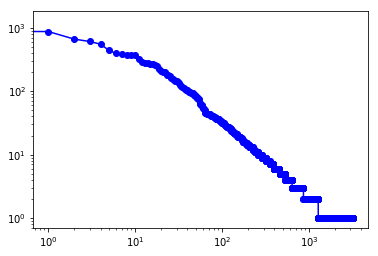

In [45]:
doc=one_sentence
pos = Hannanum().pos(doc)
cnt = Counter(pos)

print('nchars  :', len(doc))
print('ntokens :', len(doc.split()))
print('nmorphs :', len(set(pos)))
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))
print('\nLocations of "유행" in the document:')
concordance(u'유행', doc, show=True)

draw_zipf(cnt.values(), 'zipf.png')

In [46]:
kkma.sentences(one_sentence)

['가정교사 강 엘 리 자 베트는 가르침을 끝낸 다음에 자기 방으로 돌아왔다.',
 '돌아오기는 하였지만 이제껏 쾌활한 아이들과 마주 유 쾌히 지낸 그는 찜찜하고 갑갑한 자기 방에 돌아와서는 무한한 적막을 깨달았다.',
 '‘ 오늘은 왜 이리 갑갑한고?',
 '마음이 왜 이리 두근거리는 고? 마치 이 세상에 나 혼자 남아 있는 것 같군.',
 '어찌할꼬.',
 '어디 갈까.',
 '말까, 아. 혜숙이 한 테나 가보자. 이즈음 며칠 가보지도 못하였는데.’ 그의 머리에 이 생각이 나자, 그는 갑자기 갑갑하던 것이 더 심하여 지고 아무래도 혜숙이한테 가 보여야 될 것 같이 생각된다.',
 '“ 아무래도 가 보여야 겠다.” 그는 중얼거리고 외출 의를 갈아입었다.',
 '‘ 갈까?',
 '그만둘까?',
 '’ 그는 생각이 정 키 전에 문 밖에 나섰다.',
 '여학생 간에 유행하는 보법( 步法 )으로 팔과 궁둥이를 전후 좌우로 저으면서 엘 리 자 베트는 길로 나섰다.',
 '그는 파라솔을 받은 후에 손수건을 코에 대어서 쏘는 듯한 콜타르 내음 새를 막으면서 N 통 ,K 정 등을 지나서 혜숙의 집에 이 르 렀 다. 그리 부자라',
 '할 수는 없지마는, 그래도 경성 중류 민의 열에는 드는 혜숙의 집은 굉대( 宏大) 하지는 못하지만 쑬쑬 하고 정하기는 하였다.',
 '그 집의 방의 배치를 익히 아는 엘 리 자 베트는 들어서면서 파라솔을 접어서 마루 한편 끝에 놓은 후에,“ 너무 갑갑해서 놀러 왔다 얘.” 하면서 혜숙의 방으로 뛰어들어갔다.',
 '그는 들어서면서, 혜숙이가 동모( 同某) S 와 무슨 이야기를 열심으로 하다가 자기 온 것을 알고 뚝 그치는 것을 알았다.',
 '‘S 는 원, 무엇 하러 왔노.’ 그는 이유 없는 질투가 마음에서 끓어 나오는 것을 깨달았다.',
 '‘ 흥, 혜숙이는 S로 인하여 나한테 놀러도 안 오는 구만. 너희 끼리만 잘 들 놀아라.',
 '’ 혜숙이가 한 번도 자기 게 놀러 와 본 때가 없으되 엘 리 자 베트는 이렇게 생각하였다.',
 '“ 아

In [47]:
lines = one_sentence.split('.')

In [48]:
lines = lines[:-2]

In [49]:
lines[0]

'가정교사 강 엘리자베트는 가르침을 끝낸 다음에 자기 방으로 돌아왔다'

In [50]:
kkma.morphs(lines[0])

['가정교사',
 '강',
 '엘',
 '리',
 '자',
 '아',
 '베틀',
 '는',
 '가르침',
 '을',
 '끝내',
 'ㄴ',
 '다음',
 '에',
 '자기',
 '방',
 '으로',
 '돌아오',
 '았',
 '다']

In [51]:
sent = []
for line in lines:
    #sent.append(line.split(' '))
    sent.append(han.nouns(line))
    #sent.append(tw.nouns(line))

In [52]:
%%time
model = Word2Vec(sent)

Wall time: 47.1 ms


In [53]:
model.init_sims(replace=True)

In [54]:
sent[0]

['가정교사', '강', '엘리자베트', '다음', '자기', '방']

In [55]:
model.most_similar('남작')

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('그', 0.840682864189148),
 ('이십', 0.7985422611236572),
 ('것', 0.7966952323913574),
 ('방', 0.7940452098846436),
 ('때', 0.7927173972129822),
 ('엘리자베트', 0.7898049354553223),
 ('자기', 0.7693458199501038),
 ('리', 0.7650659084320068),
 ('생각', 0.7528566122055054),
 ('가운데', 0.7457515597343445)]

In [56]:
model.most_similar('소리')[0][0]

C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


'자기'

In [57]:
def next_word(item, i):
    return model.most_similar(item)[i][0]

In [58]:
import numpy as np

In [59]:
sentence = ''
for i in range(10):
    if i == 0:
        temp = '엘리자베트'
    elif temp in sentence:
        temp = next_word(temp, np.random.randint(10))
    else:
        temp = next_word(temp, 0)
    sentence += ' %s' %temp
print(sentence)

 엘리자베트 뒤 생각 방 그 자기 소리 때 그 생각


C:\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


# 위키 카테고리 읽기

In [60]:
from wikidata.client import Client

In [61]:
cl = Client()

In [62]:
ent = cl.get('Q20145', load=True)

In [63]:
len(ent.data)

12

In [64]:
ent.data['aliases']['ko']

[{'language': 'ko', 'value': '이지은'}, {'language': 'ko', 'value': 'IU'}]

## 